# Exploring Mushrooms

When asked to think of a mushroom, you might imagine the following:

![this shows a photo of some generic button mushrooms in a forest.](https://static-assets.codecademy.com/Paths/data-analyst-career-path/mushroom-analysis-project/generic_mushroom.jpg)

It's a beige, convex mushroom top with a uniform, thick stem. Maybe you thought of it cut up on a slice of delicious pizza or braised with sauce over rice. Regardless, you most likely did not consider this:

![A photo of some beautiful mushrooms in a forest. They do not have the signature "mushroom top" and have visually appealing grooves that make them look almost like floral.](https://static-assets.codecademy.com/Paths/data-analyst-career-path/mushroom-analysis-project/pretty_mushroom.jpg)

Mushrooms exist in a variety of different colors, shapes, sizes, textures, etc. In this project, you will analyze an extensive mushroom dataset from [UCI](https://archive.ics.uci.edu/ml/datasets/Mushroom) using bar charts and acquaint yourself with the diverse array of mushrooms that exist worldwide.

## Looking Over the Data

1. Take a look at the code block below where we've loaded **mushroom_data.csv**. It contains 23 columns of data describing thousands of mushrooms. In the output below the code block, data about five different mushrooms is shown.

   Read through this table to get a sense of the type(s) of variables in the data and the structure of the table. It may also be helpful to read through the information on [Kaggle](https://www.kaggle.com/uciml/mushroom-classification).
   
   Before you move on to plotting any of this data, answer the following questions:
   * What type(s) of variables does **mushroom_data.csv** contain?
   * How many of the variables can we visualize effectively with a bar graph?
   
   View **Exploring Mushrooms_Solution.ipynb** to see our answers.

In [4]:
!pip install matplotlib
!pip install pandas
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load in the data
df = pd.read_csv("mushroom_data.csv")
print(df.head())

       Class Cap Shape Cap Surface Cap Color  Bruises     Odor  \
0  Poisonous    Convex      Smooth     Brown     True  Pungent   
1     Edible    Convex      Smooth    Yellow     True   Almond   
2     Edible      Bell      Smooth     White     True    Anise   
3  Poisonous    Convex       Scaly     White     True  Pungent   
4     Edible    Convex      Smooth      Gray    False      NaN   

  Gill Attachment Gill Spacing Gill Size Gill Color  ...  \
0            Free        Close    Narrow      Black  ...   
1            Free        Close     Broad      Black  ...   
2            Free        Close     Broad      Brown  ...   
3            Free        Close    Narrow      Brown  ...   
4            Free      Crowded     Broad      Black  ...   

  Stalk Surface Below Ring Stalk Color Above Ring Stalk Color Below Ring  \
0                   Smooth                  White                  White   
1                   Smooth                  White                  White   
2             

2. There are 23 variables in this dataset (one for each column). One of them (the `Bruises` variable) has `True` or `False` responses. This will create problems when we try to plot this column later on. 

   One way we can fix this issue is by converting each `True` and `False` value to a string. Iterate through the elements in the `Bruises` variable and convert each value to a string using the `str()` method.
   
   Now, all our variables are of `object` types, which means we can graph them. Graphing each one individually would be tedious; luckily, you will use loops.

   If you look at the code block below, you will see an attribute called `columns`. This attribute returns the name of each variable in **mushroom_data.csv**.
   - Create a loop that traverses each `column` in the `columns` list.
   - Print each `column` in `columns` while iterating through the loop. This is to check that your `for` loop is working correctly.

In [6]:
# list of all column headers
columns = df.columns.tolist()

for column in columns:
    print(column)


Class
Cap Shape
Cap Surface
Cap Color
Bruises
Odor
Gill Attachment
Gill Spacing
Gill Size
Gill Color
Stalk Shape
Stalk Root
Stalk Surface Above Ring
Stalk Surface Below Ring
Stalk Color Above Ring
Stalk Color Below Ring
Veil Type
Veil Color
Ring Number
Ring Type
Spore Print Color
Population
Habitat


3. In the output above, you should see 23 column names pop up starting with `class` and ending with `habitat`.

   Great! Your `for` loop is working, so feel free to comment out your print statement.
   
   You can now plot your data using the `.countplot()` method from the seaborn library. Follow these steps:
   - Call `.countplot()` in the `for` loop
   - Use `column` and the `df` pandas DataFrame to graph the value counts of each variable in **mushroom_data.csv**.
   
   Please wait until the next task to use `plt.show()`.

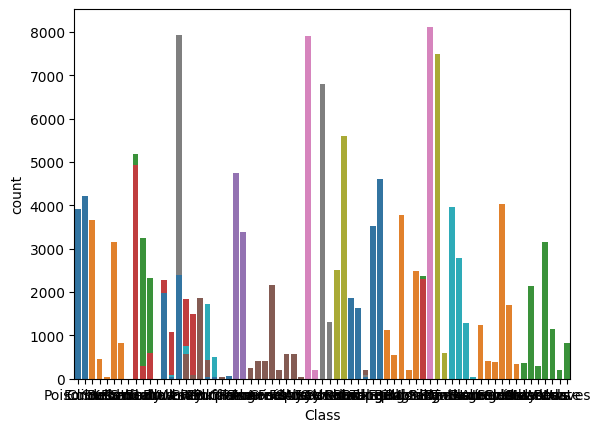

In [16]:
for column in columns:
    sns.countplot(x=df[column], data=df)

4. At the end of your `for` loop, add the following lines of code to show your plots:

   ```py
   plt.show()
   plt.clf()
   ```
   
   The `.show()` Matplotlib method should look familiar from the previous lesson, but [.clf()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.clf.html) might be unfamiliar. This method is also from the Matplotlib library. It clears any previous figure formatting. This will keep any graphs you are plotting from bunching up on each other. Instead, your plots will be neatly stacked on top of each other with spacing ideal for viewing.

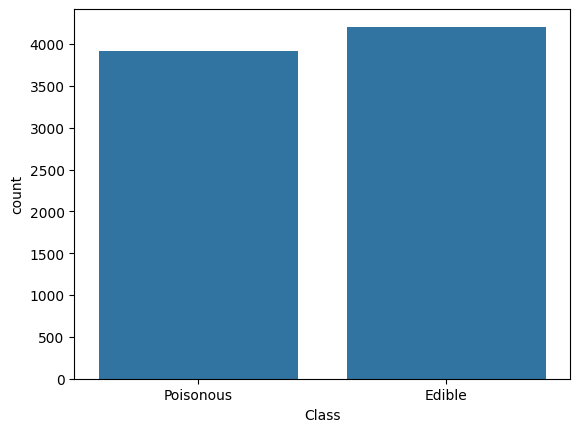

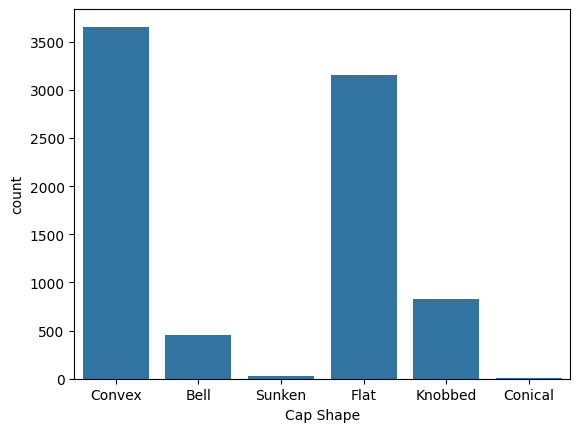

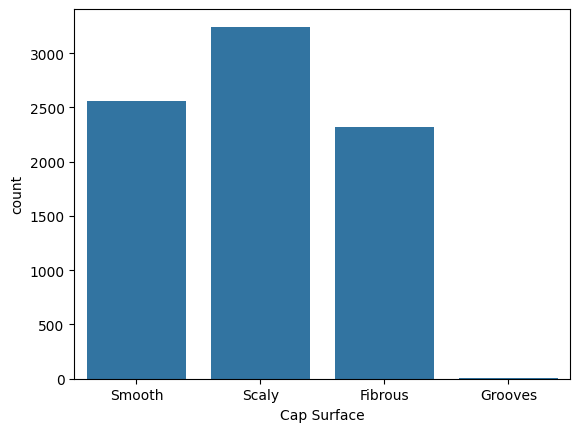

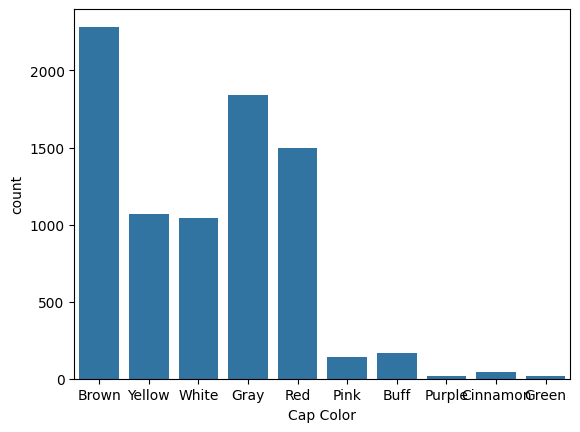

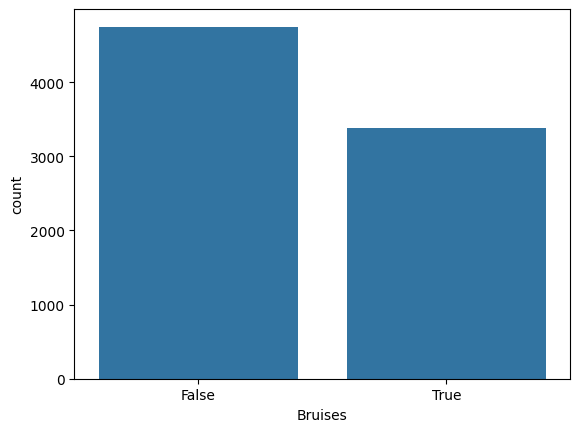

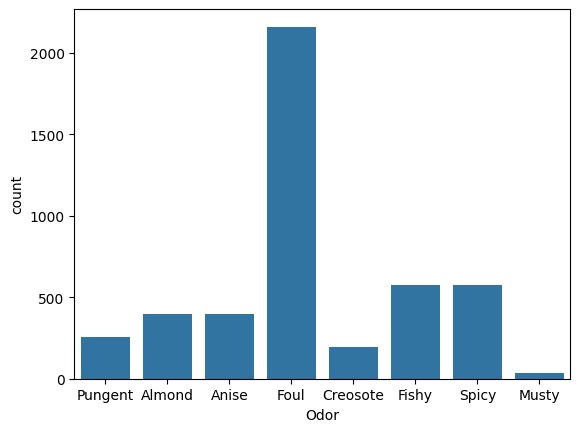

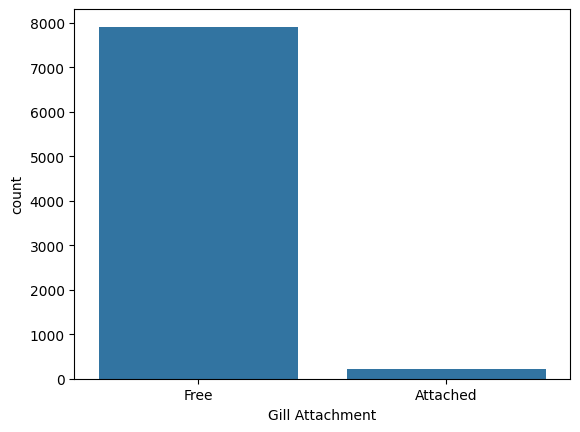

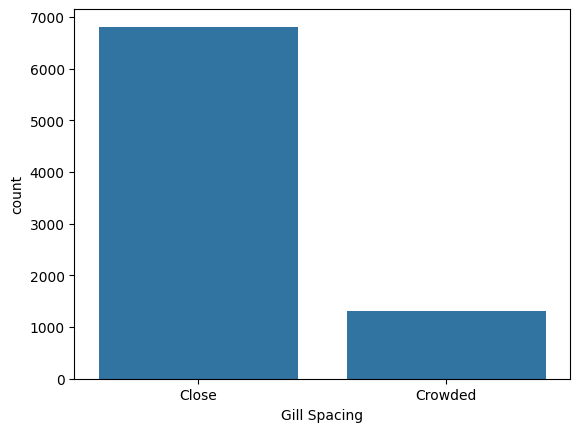

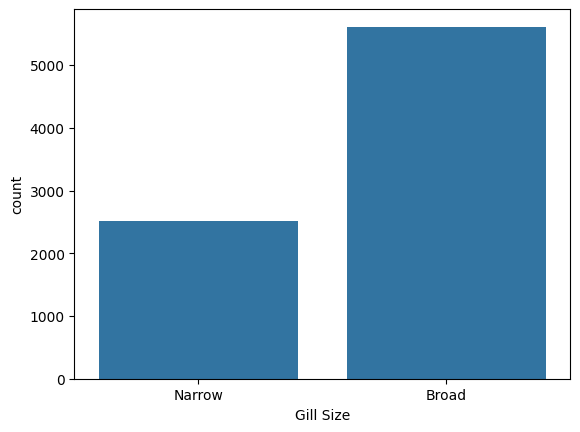

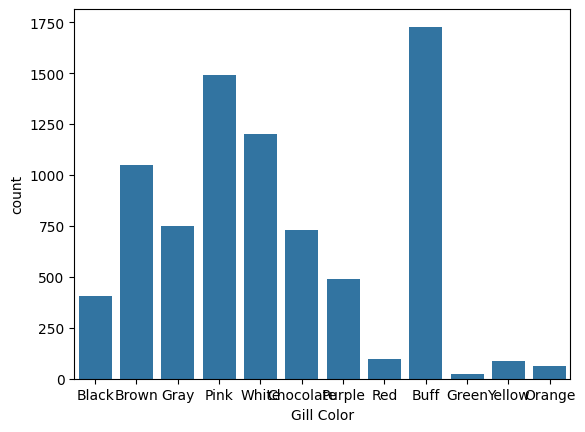

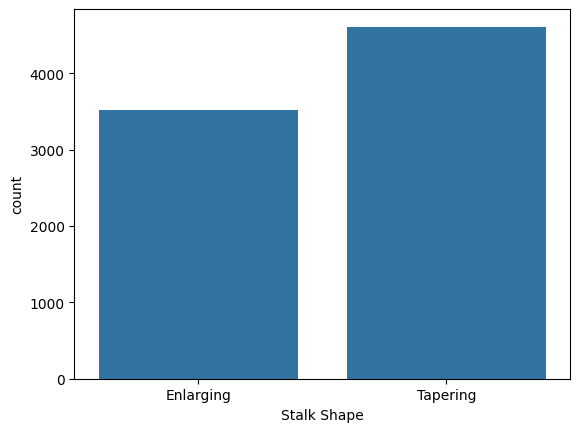

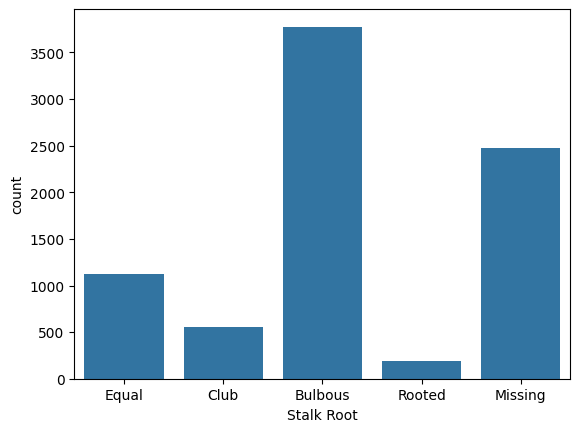

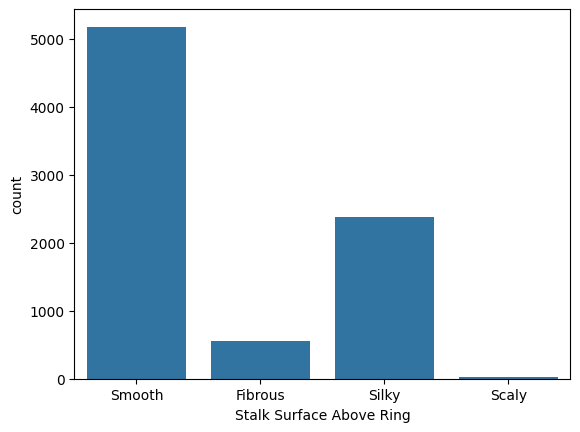

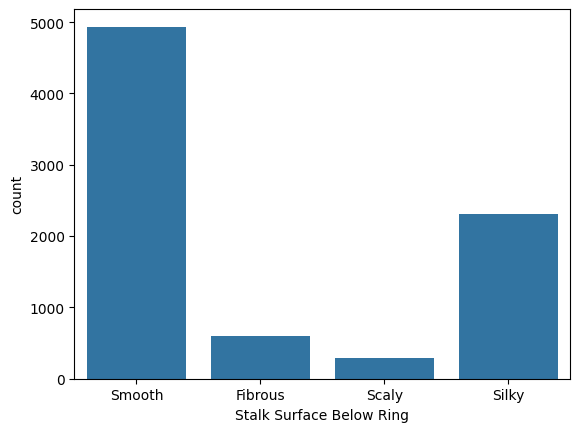

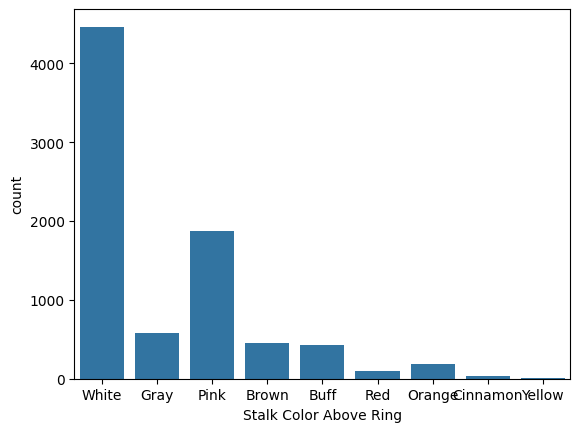

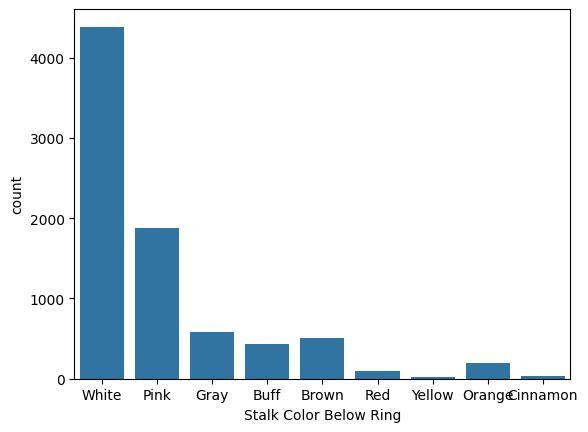

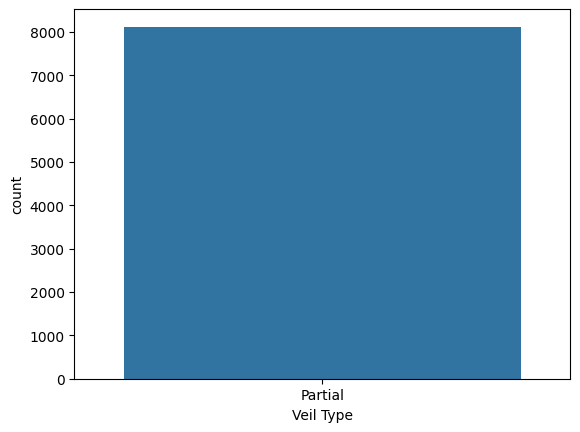

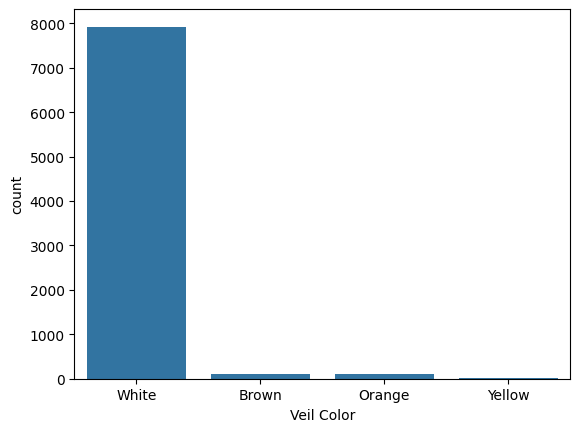

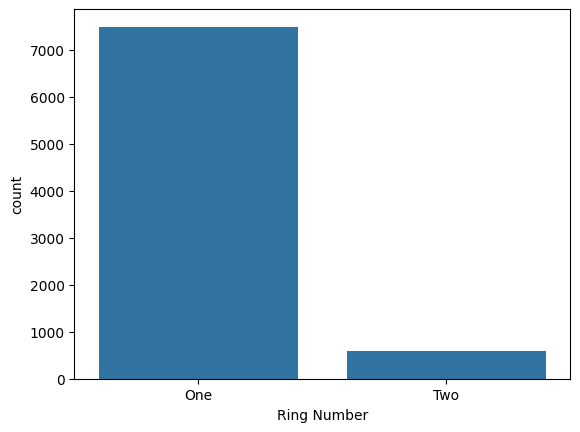

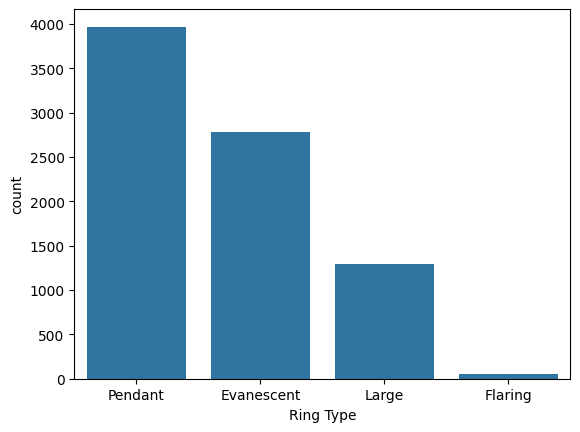

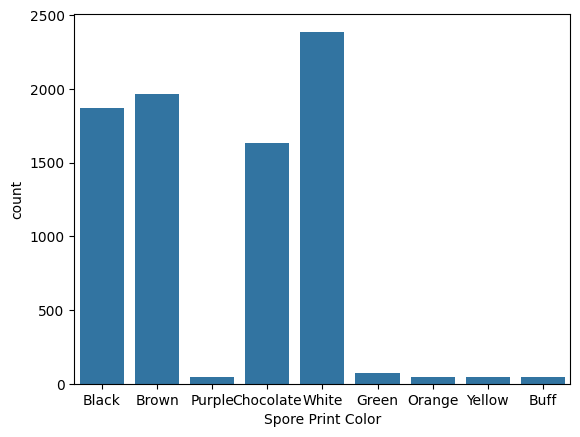

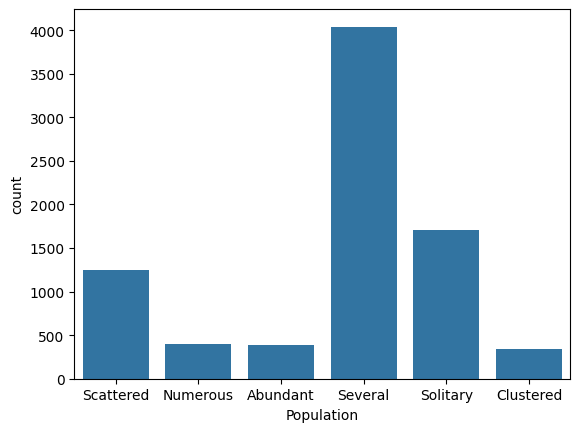

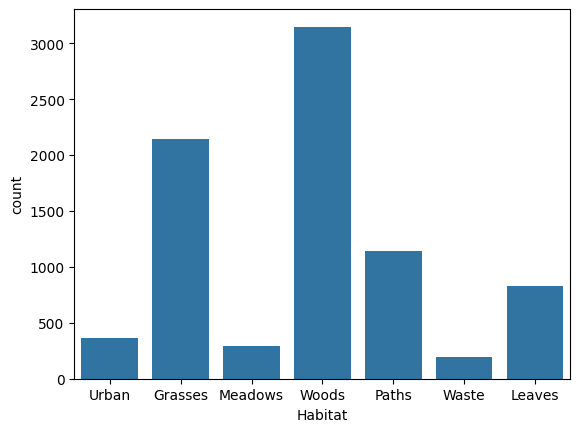

<Figure size 640x480 with 0 Axes>

In [17]:
for column in columns:
    sns.countplot(x=df[column], data=df)
    plt.show()
    plt.clf()

5. After using `plt.show()` and `plt.clf()`, 23 plots should appear in the output below the previous code block. Scroll through each of the graphs, and see what sort of trends you immediately see.
   - What variables have an obvious mode?
   - Do any of them have a notably diverse array of values?
   - What habitat are you most likely to find mushrooms in?
   
   What questions did you have before seeing the graphs? What questions are popping up now that you see them?
   
   In the next few steps, you will clean up the graphs and make them more readable and useful for finding patterns.

## Cleaning the Bar Graphs

6. As you scroll through the graphs, you may notice some imperfections. For example, some of the x-axis labels overlap each other. The font size for the labels along the x-axis is also pretty small, making them tough to read.

   Let's fix these up with two lines of code.
   
   Following your `.countplot()` method, add the following two lines of code in your `for` loop:
   ```py
   # rotates the value labels slightly so they don't overlap, also slightly increases font size
   plt.xticks(rotation=30, fontsize=10)
   # increases the variable label font size slightly to increase readability
   plt.xlabel(column, fontsize=12)
   ```

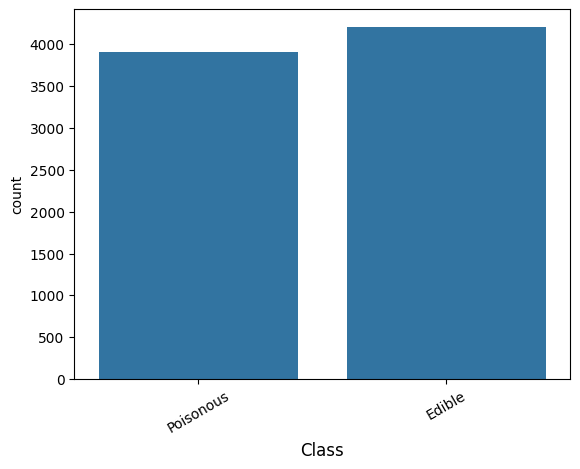

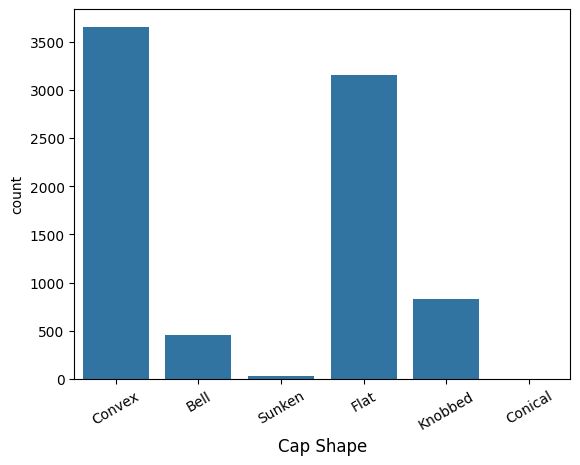

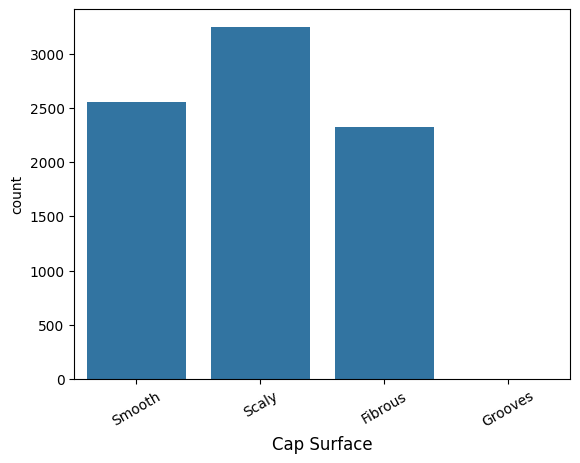

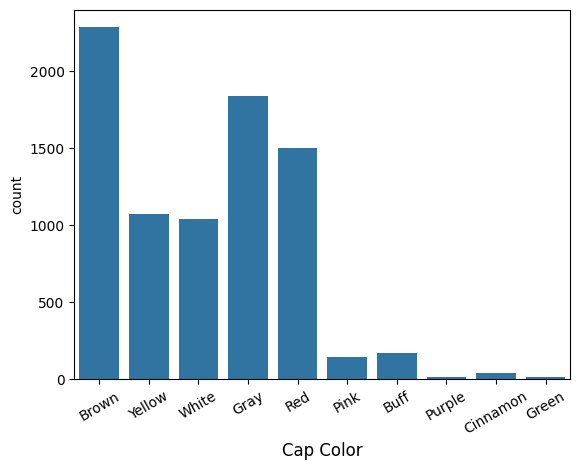

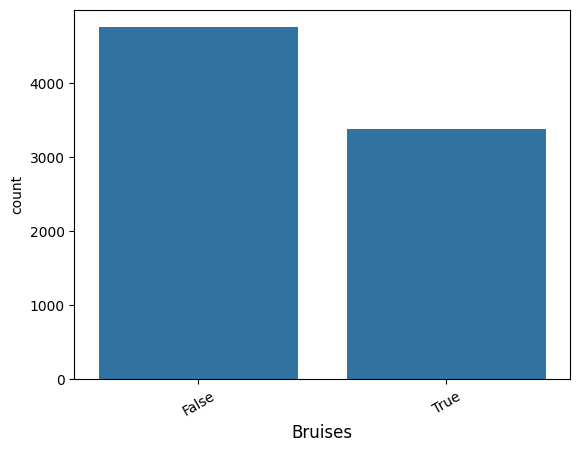

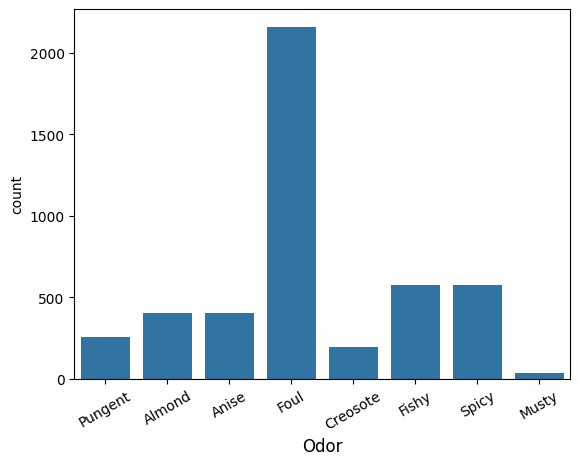

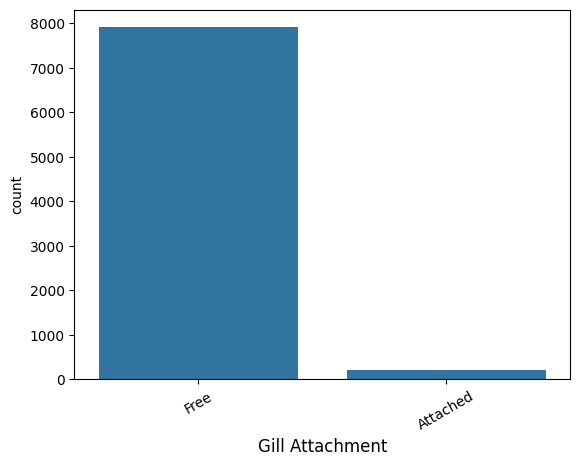

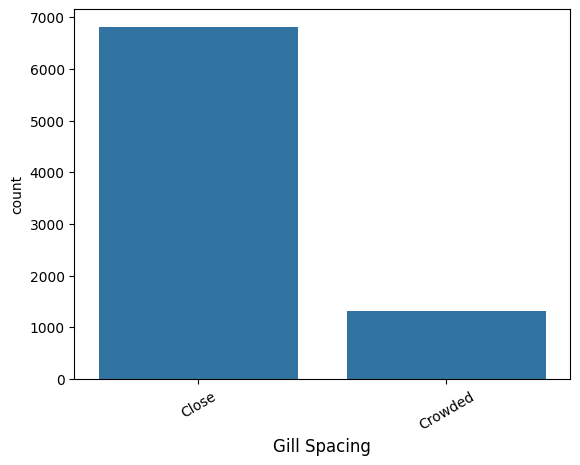

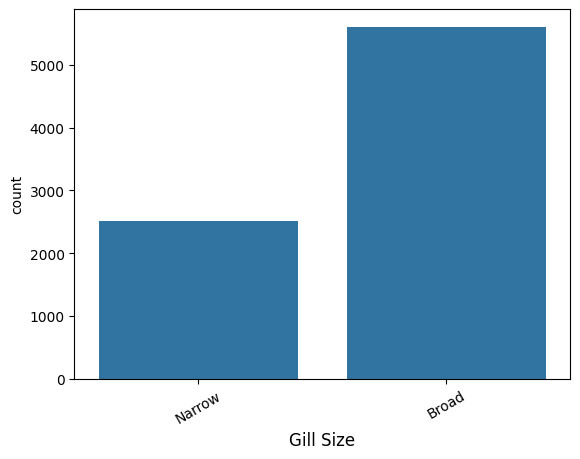

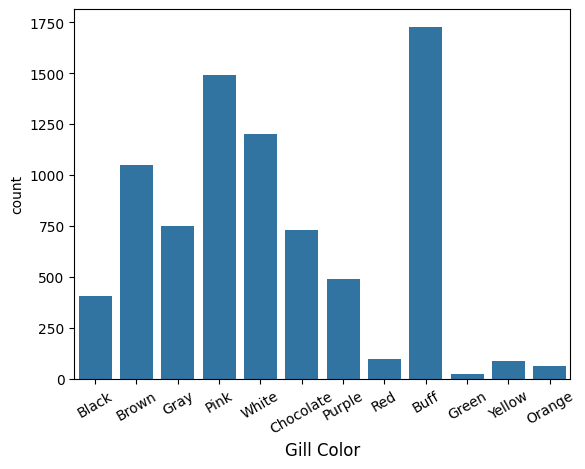

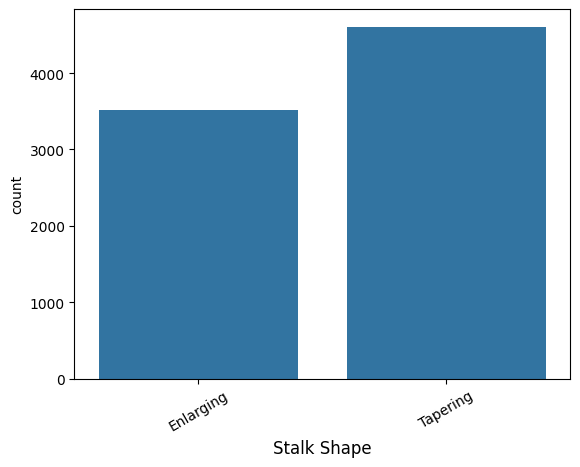

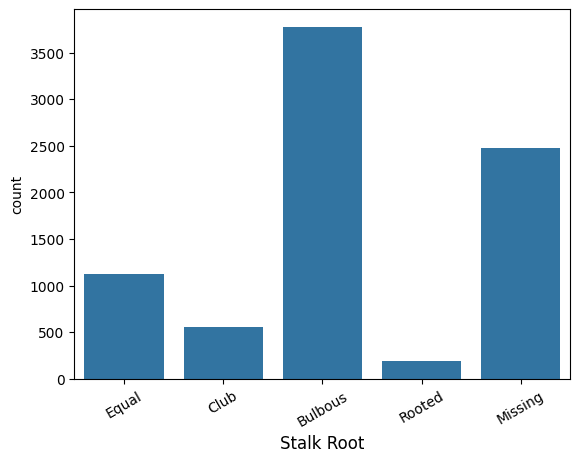

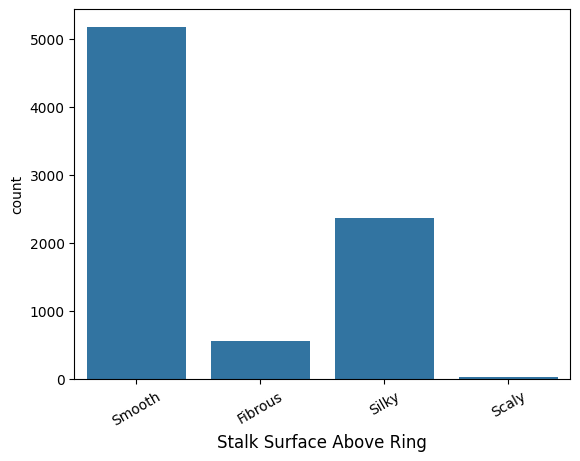

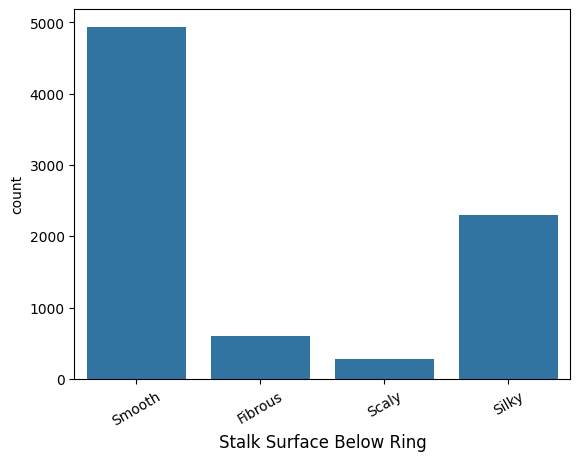

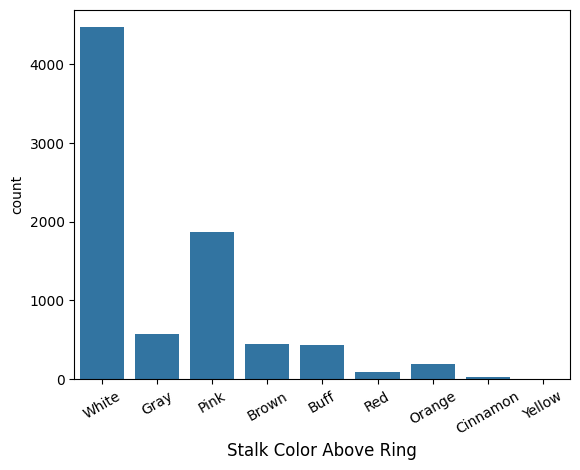

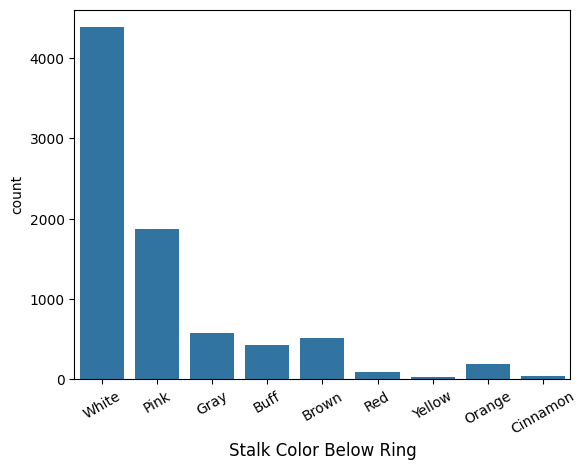

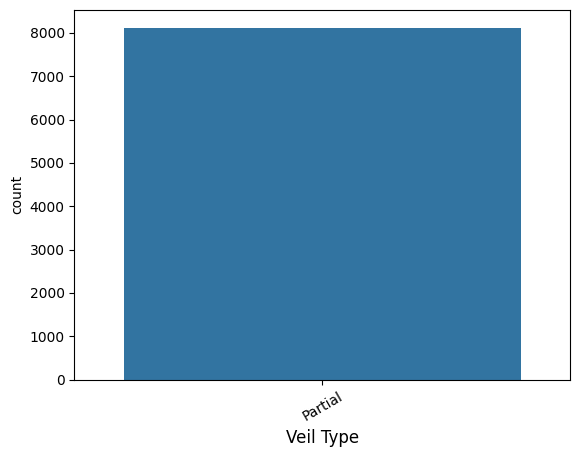

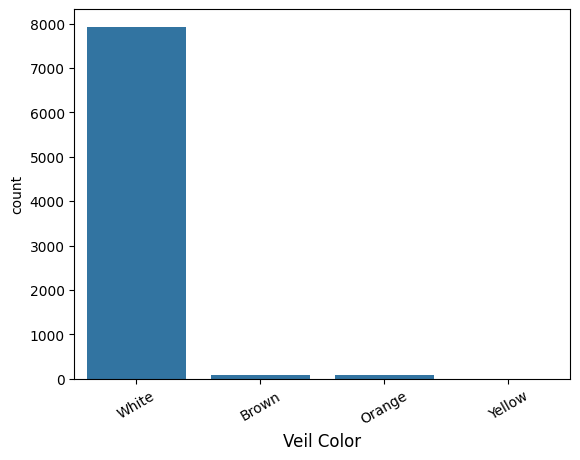

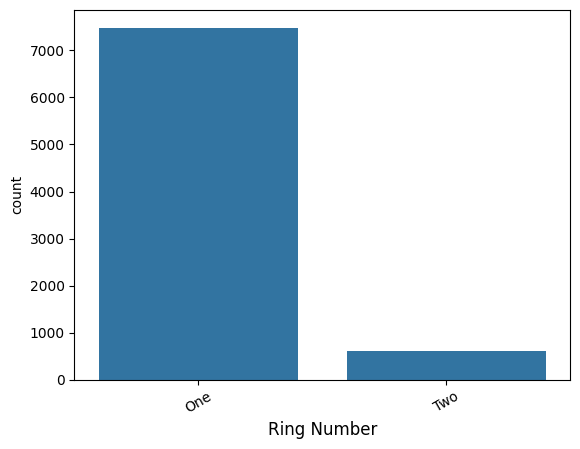

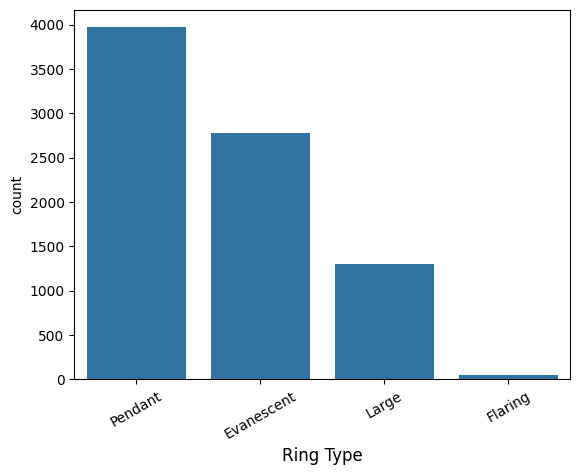

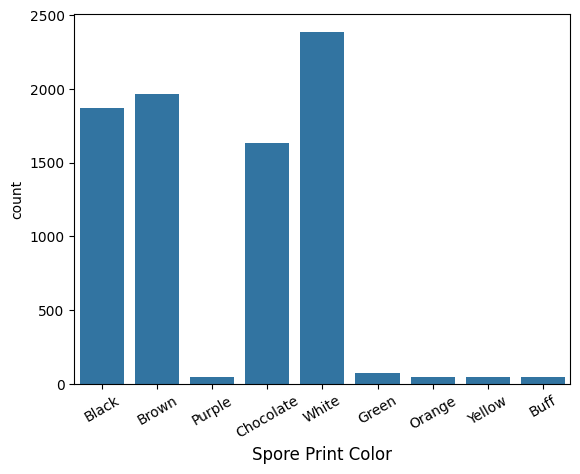

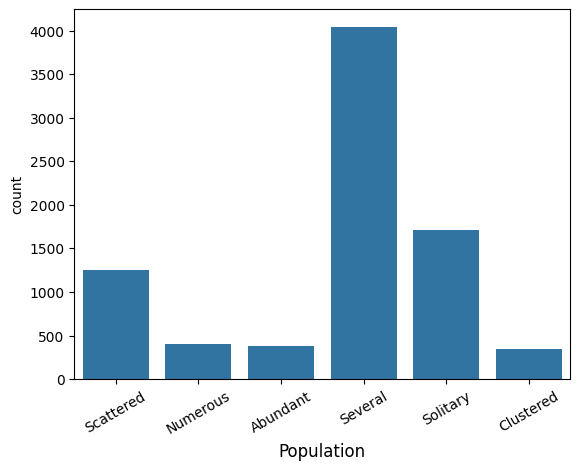

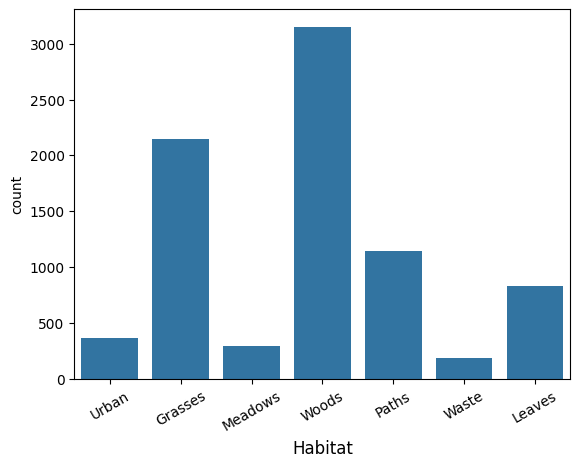

<Figure size 640x480 with 0 Axes>

In [18]:
for column in columns:
    sns.countplot(x=df[column], data=df)
    # rotates the value labels slightly so they don't overlap, also slightly increases font size
    plt.xticks(rotation=30, fontsize=10)
    # increases the variable label font size slightly to increase readability
    plt.xlabel(column, fontsize=12)
    plt.show()
    plt.clf()

7. One more thing you can do to increase readability is to add an informative title. Using `.title()` from the Matplotlib library, give your graph the following title:

   ```
   {Variable Name} Value Counts
   ```
   
   Use `column` to capture each column name. Be sure to call this method after `.countplot()` inside of your `for` loop.

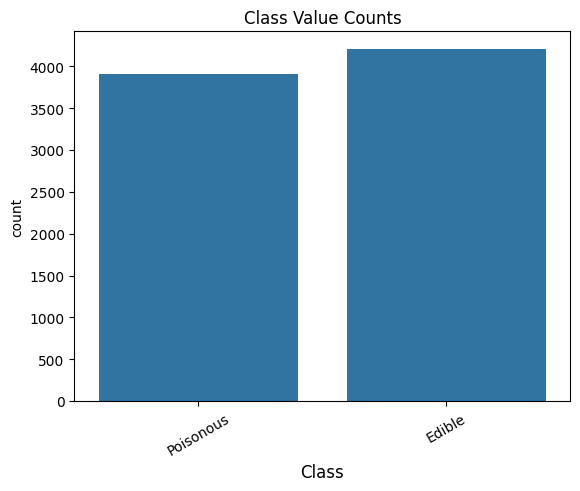

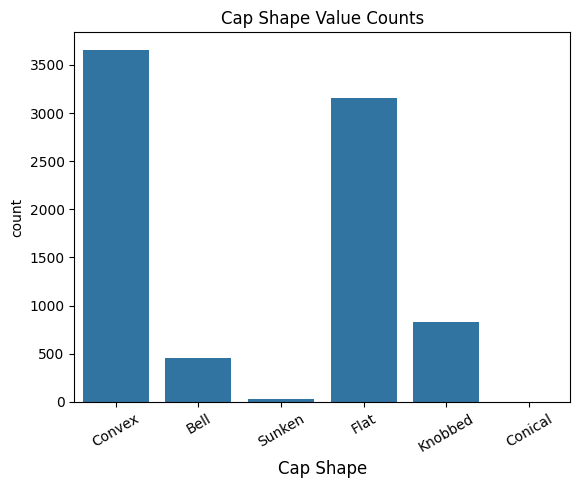

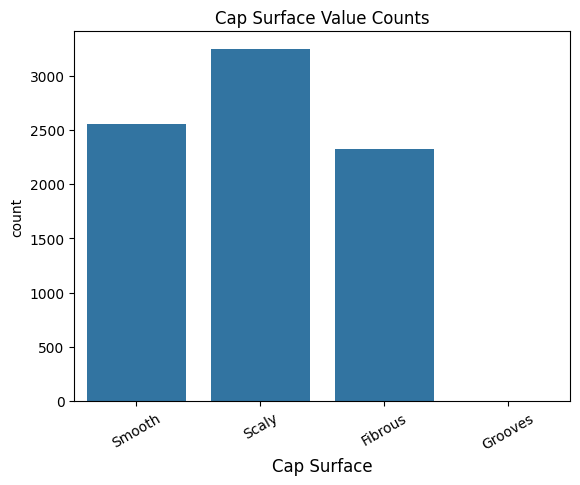

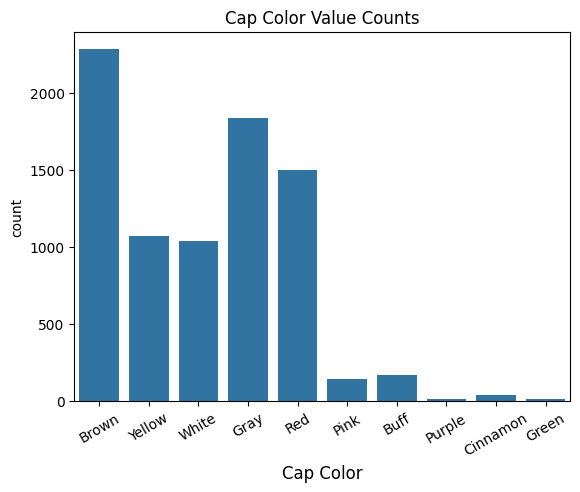

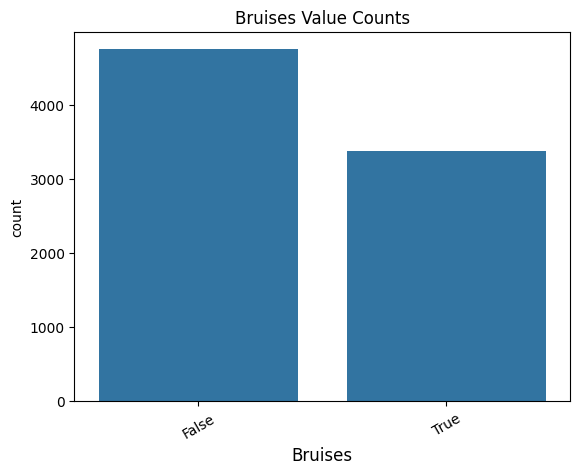

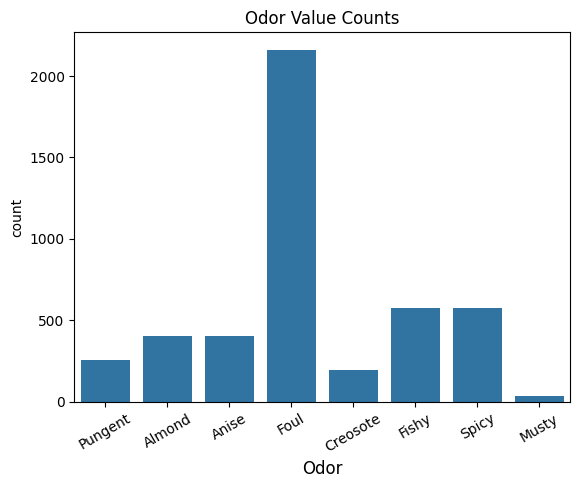

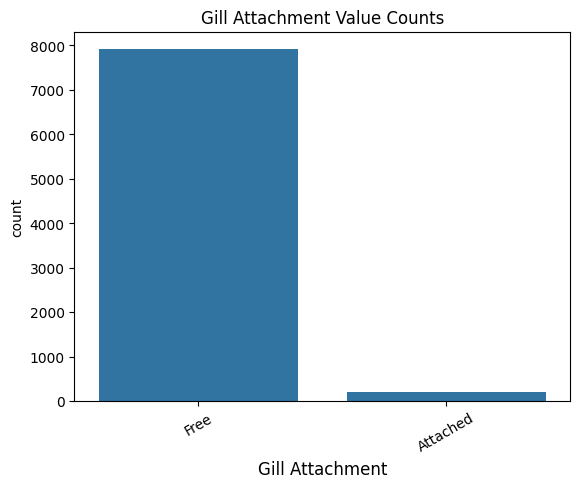

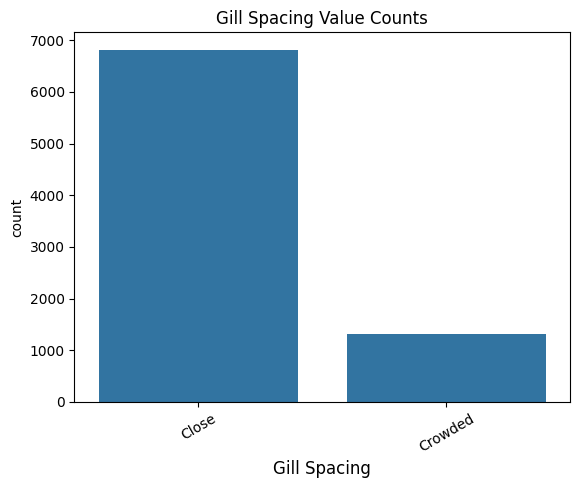

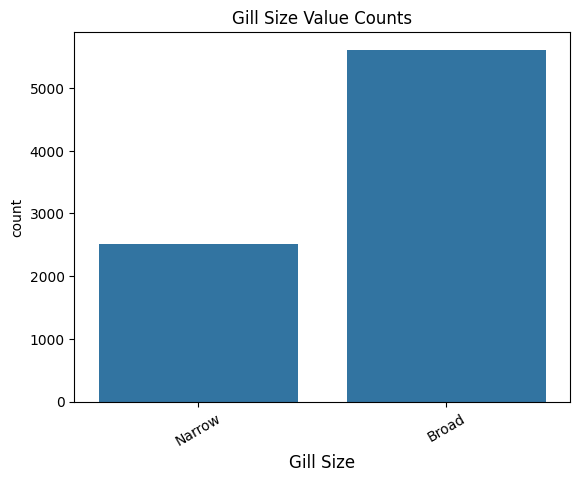

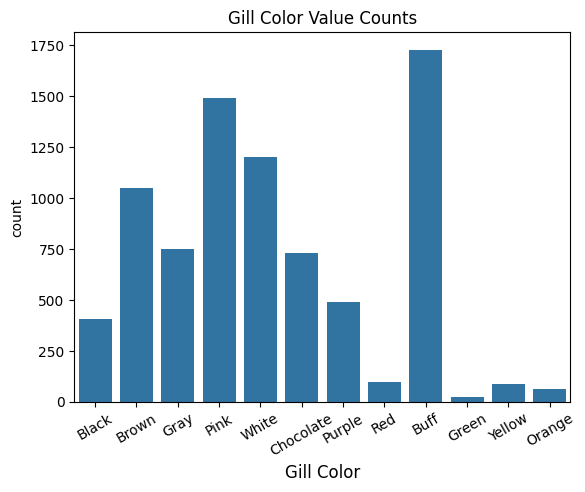

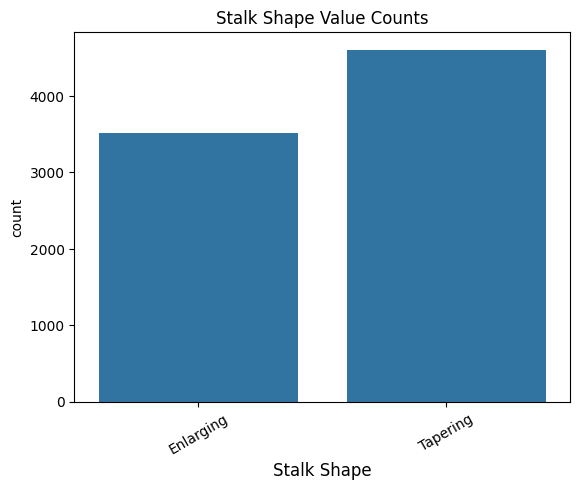

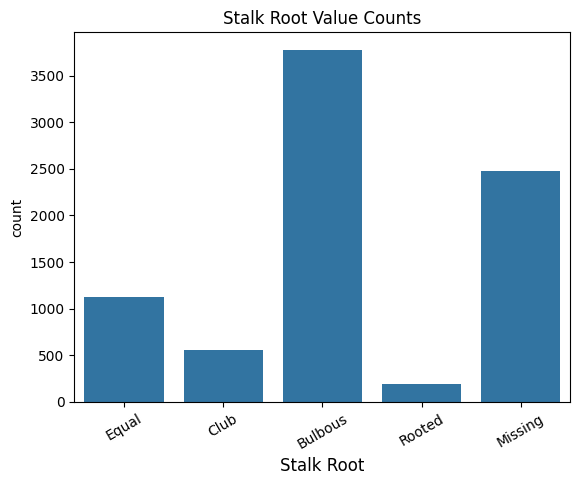

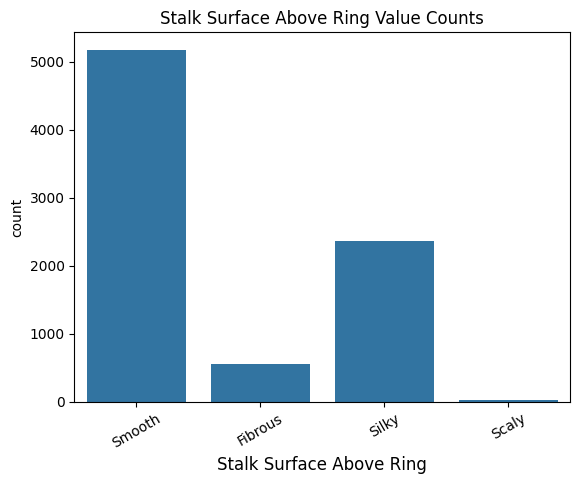

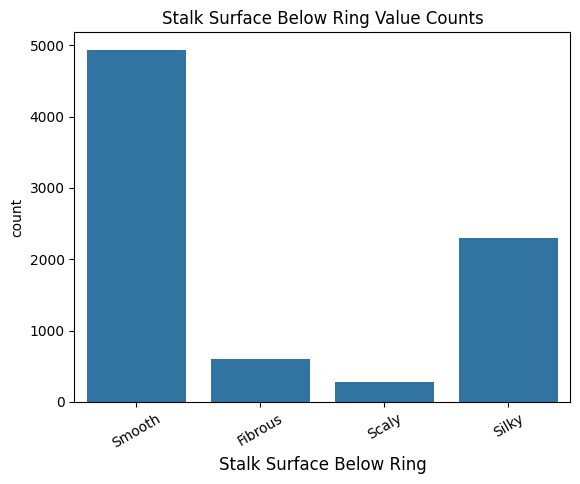

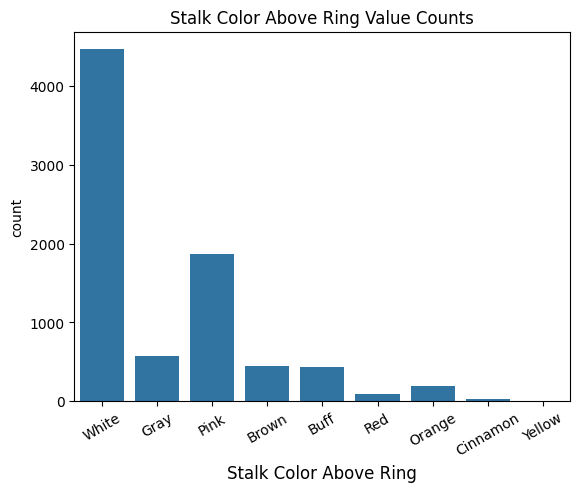

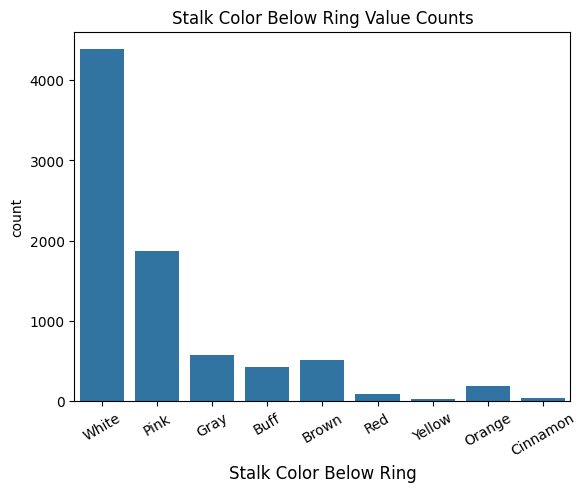

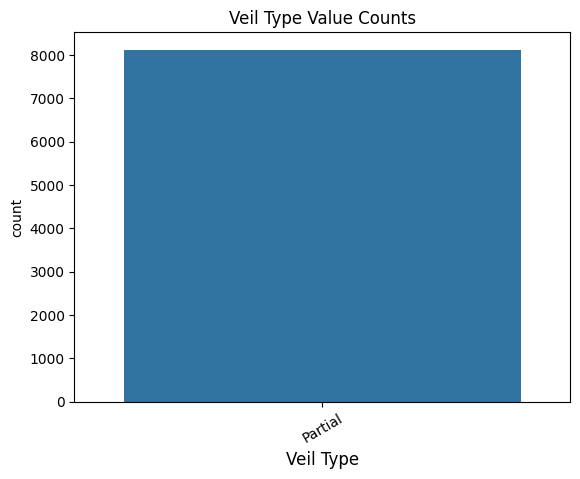

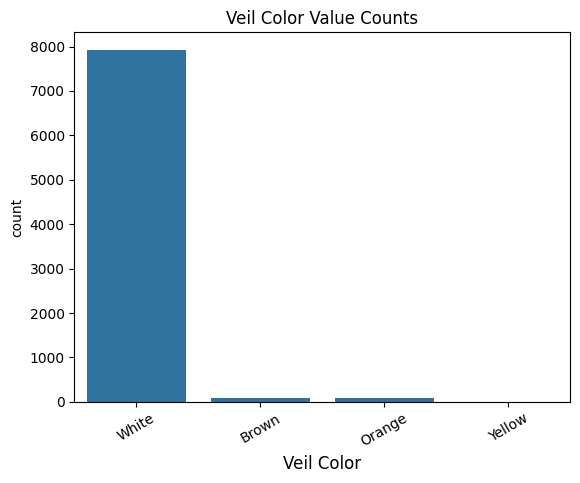

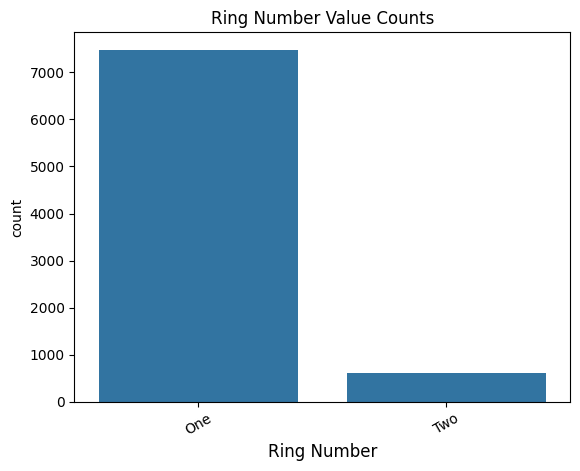

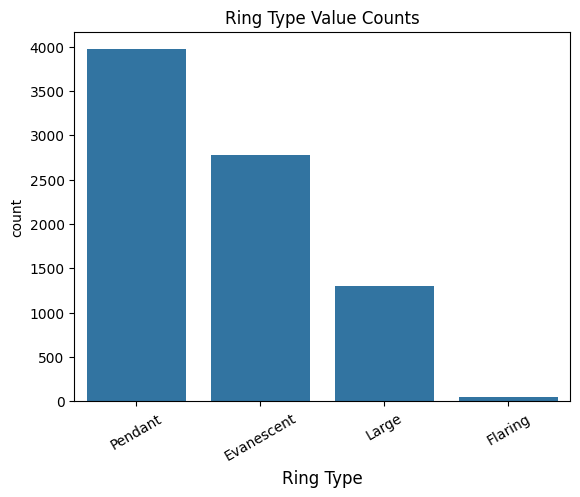

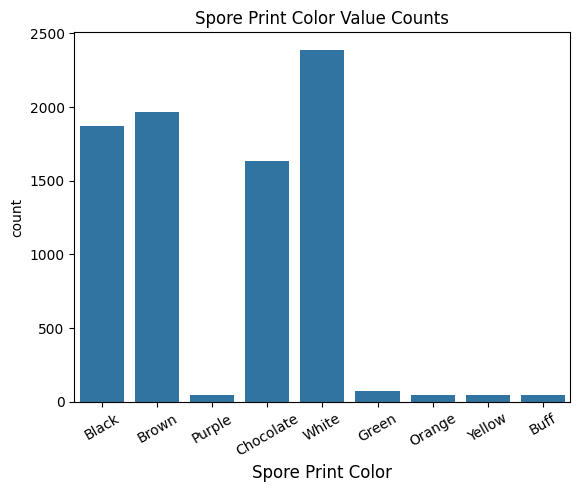

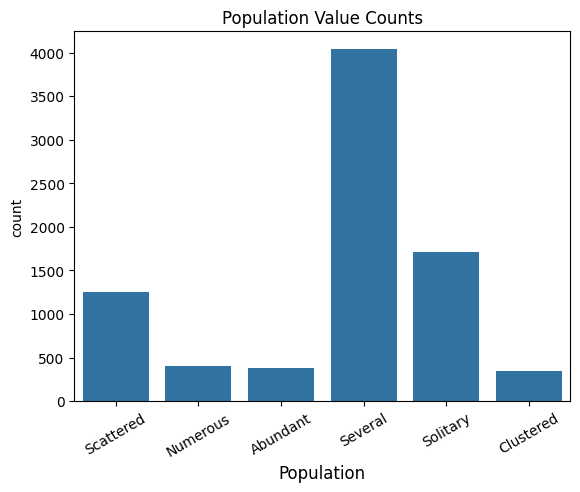

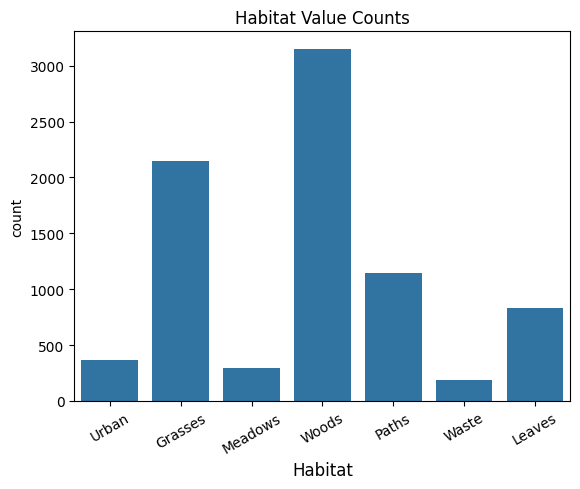

<Figure size 640x480 with 0 Axes>

In [19]:
for column in columns:
    sns.countplot(x=df[column], data=df)
    plt.title(f'{column} Value Counts')
    # rotates the value labels slightly so they don't overlap, also slightly increases font size
    plt.xticks(rotation=30, fontsize=10)
    # increases the variable label font size slightly to increase readability
    plt.xlabel(column, fontsize=12)
    plt.show()
    plt.clf()

## Ordering the Bars for Analysis

8. The graphs are readable, but you can take it another step further.
   - Add the `order` parameter to your `.countplot()` method.
   - Set the parameter to that the value counts in each column are in descending order.
   
   You will need to use the `.value_counts()` pandas method and the `.index` pandas object.

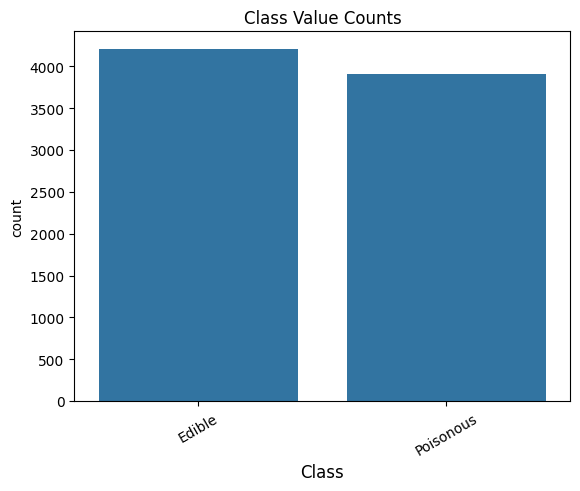

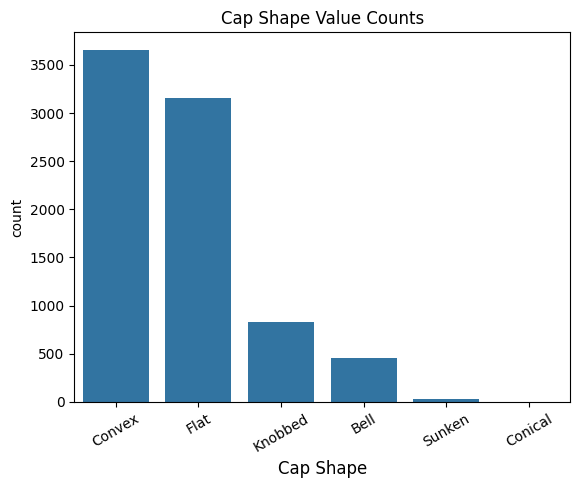

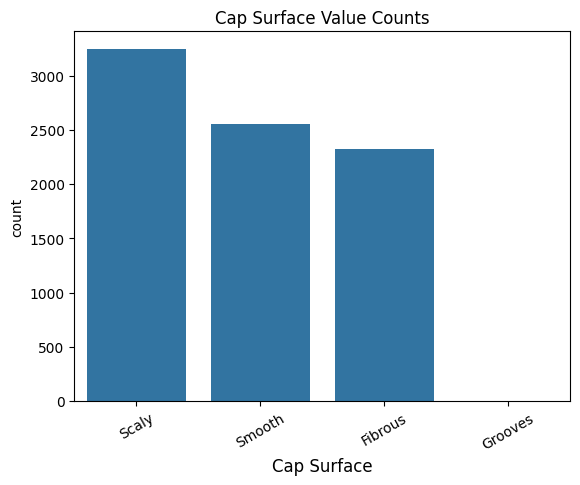

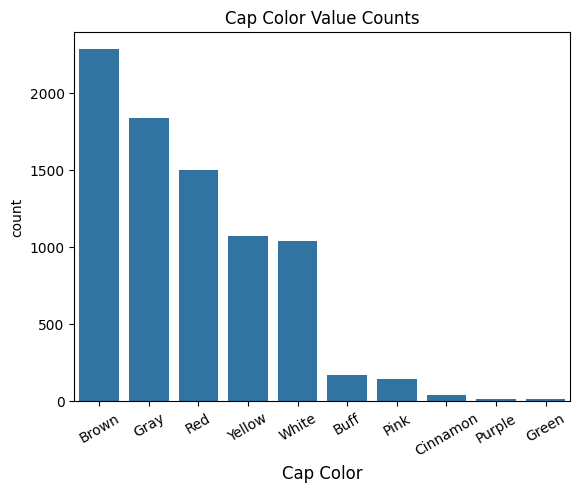

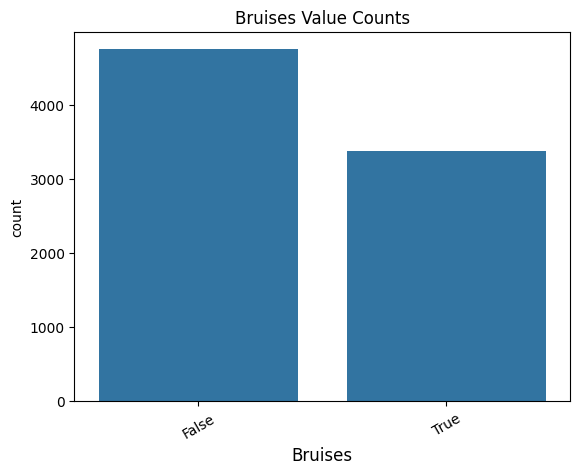

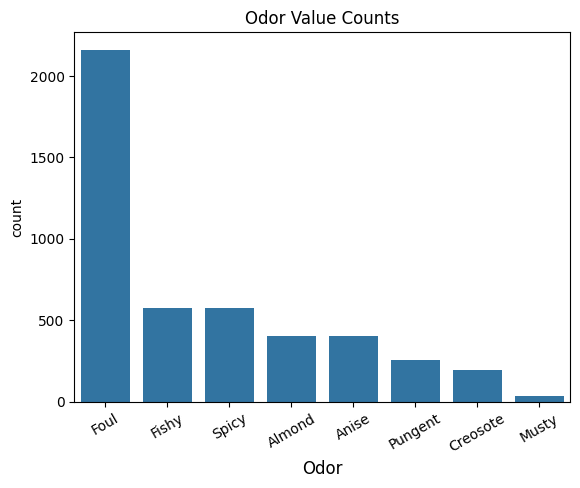

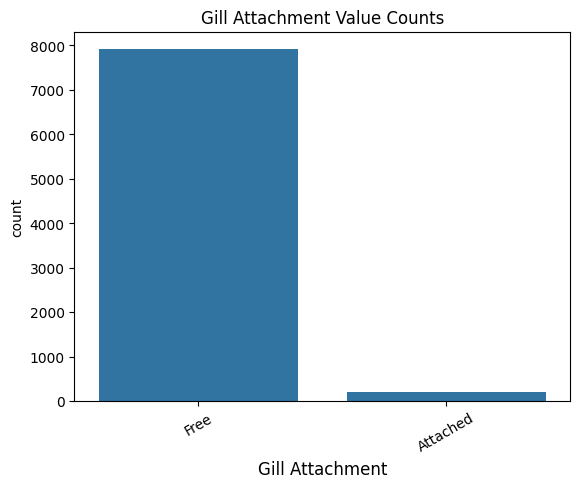

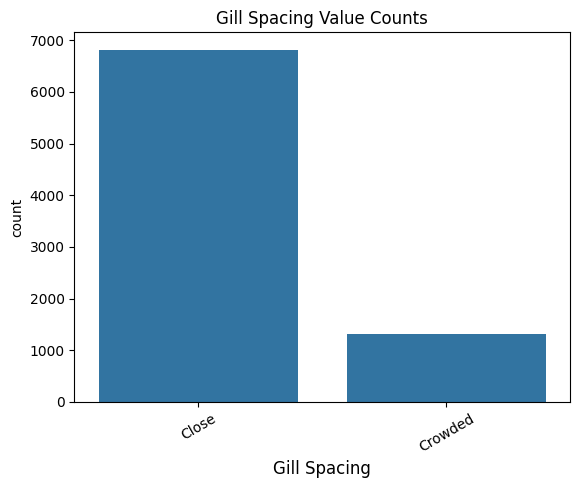

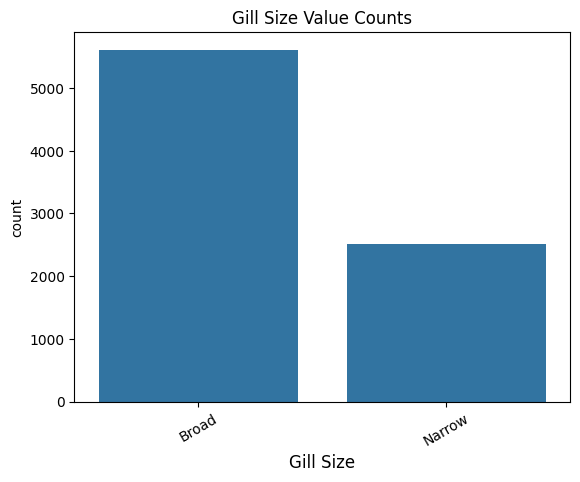

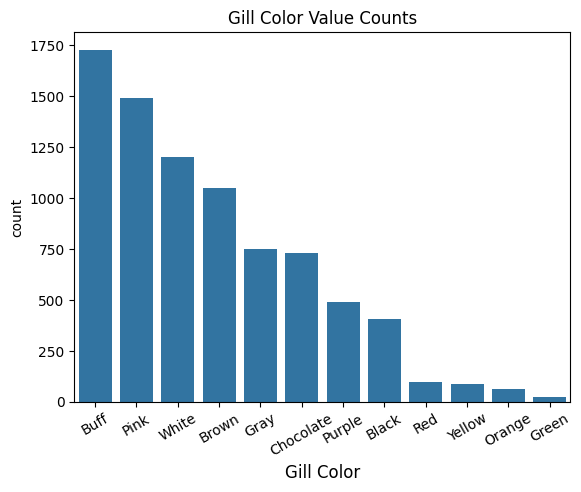

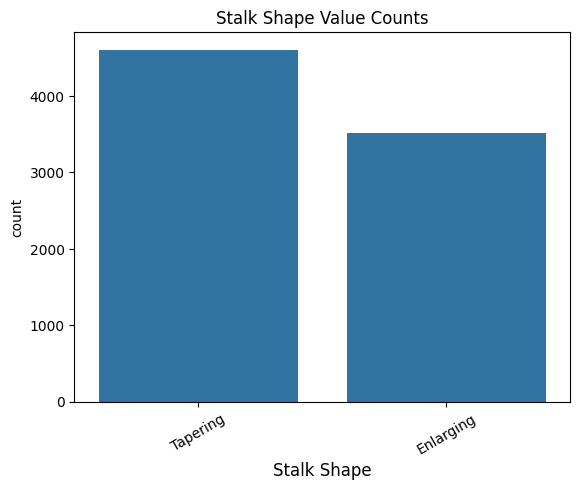

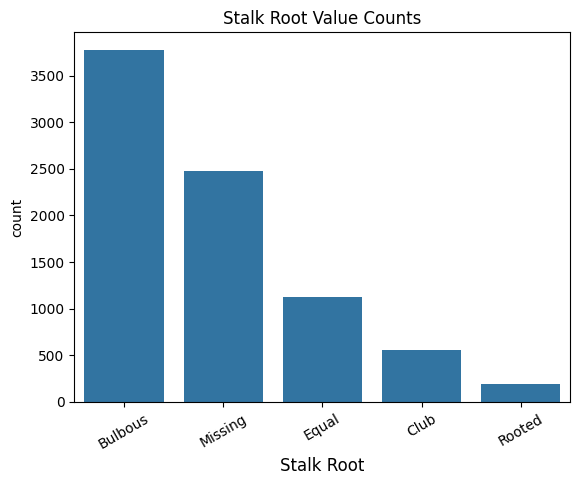

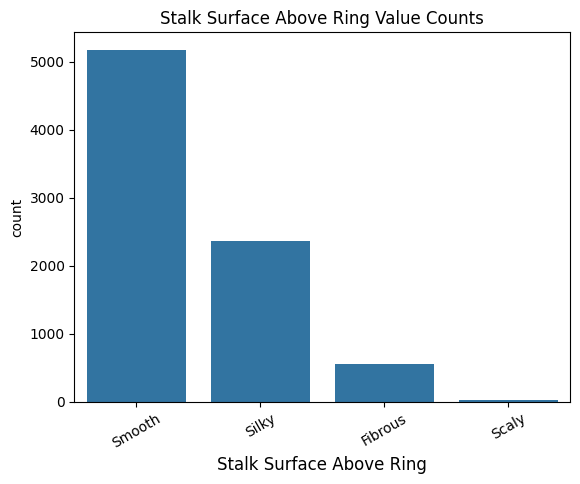

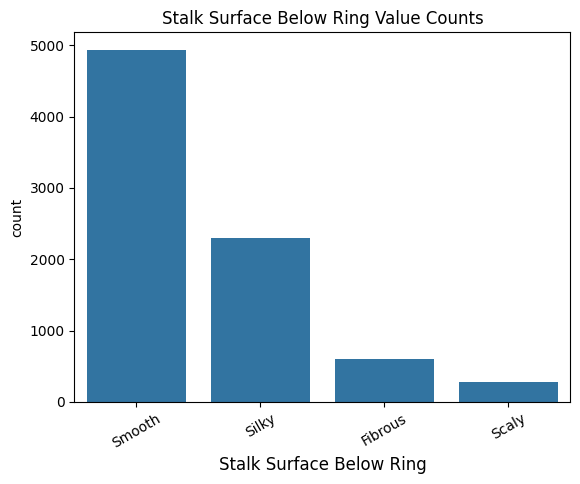

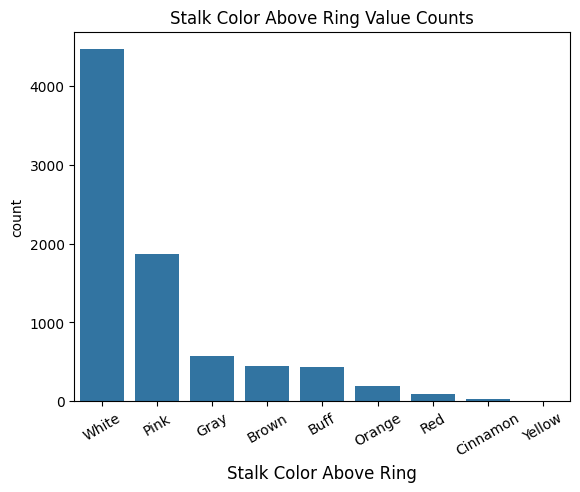

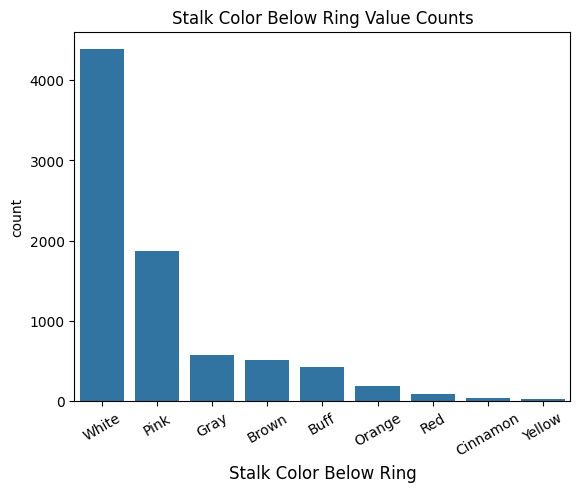

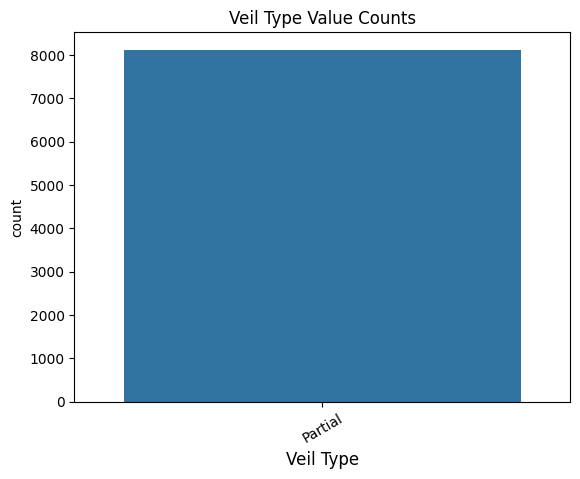

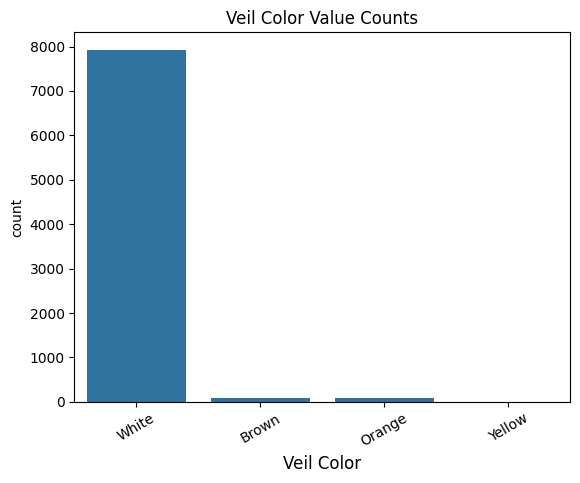

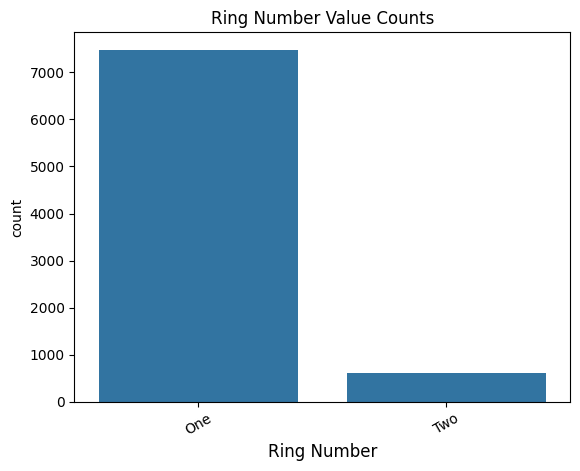

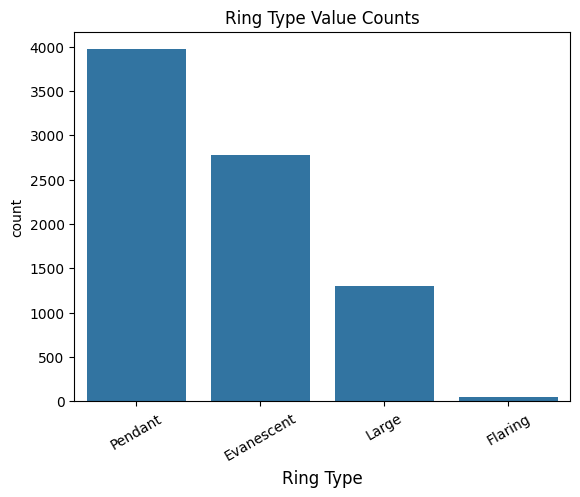

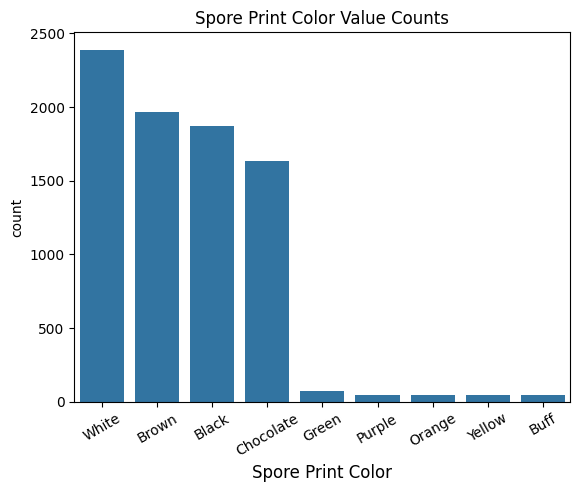

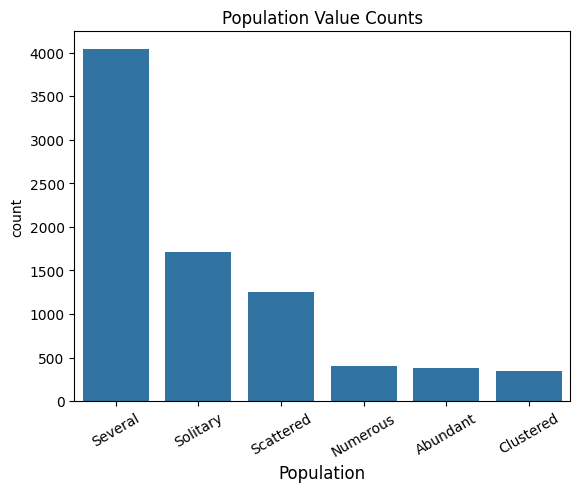

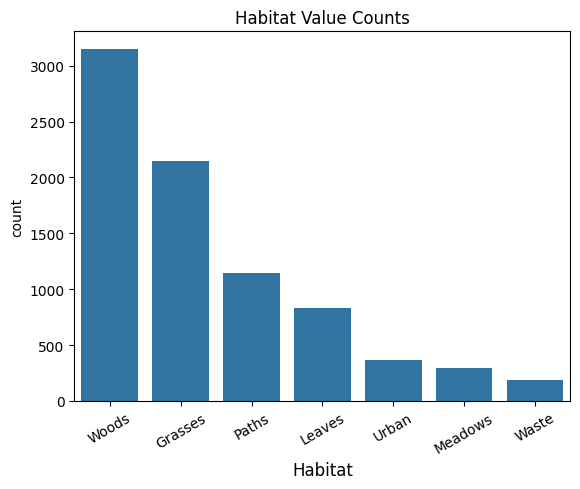

<Figure size 640x480 with 0 Axes>

In [20]:
for column in columns:
    sns.countplot(x=df[column], data=df, order=df[column].value_counts().index)
    plt.title(f'{column} Value Counts')
    # rotates the value labels slightly so they don't overlap, also slightly increases font size
    plt.xticks(rotation=30, fontsize=10)
    # increases the variable label font size slightly to increase readability
    plt.xlabel(column, fontsize=12)
    plt.show()
    plt.clf()

9. Great job! In relatively few lines of code, you have created 23 informative plots. Now that they are titled, labeled clearly, and ordered, you can really dive in on your analysis.

   Think about how someone could best use these visualizations. It is easy to tell which features of mushrooms are most common and rare, and we get insights into the variety of mushrooms in the fungi kingdom.
   
   Spend some time looking over the graphs. Write down exciting insights you find. Here are some examples to get you started:
   - It is a roughly equal split between mushrooms that are edible vs. poisonous.
   - The majority of mushrooms in this dataset have a scaly surface.
   - There are a non-insignificant amount of mushrooms that give off an almond scent?!!!
   - Most top surfaces of mushrooms in this dataset are scaly rather than smooth.
   
   Some of your analysis may also require research into mushroom features for any of the x-labels. We hope you enjoy continuing to explore the world of these fun guys!

## Extensions

10. Feel free to play around with the graphs and customize them any way you want to help in your analysis! Here are some ideas to get yourself started:
    * Turn any bar graph with less than six bars into a pie chart (hint: use a conditional statement!).
    * Create your bar charts using a list comprehension instead of a `for` loop.
    * Change the color theme of your graphs using the seaborn [color](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [palette](https://seaborn.pydata.org/tutorial/color_palettes.html) parameters.
    * Remove any graphs you find uninformative.
    * Change around the current title or label formatting.
    
    Happy Coding! :)

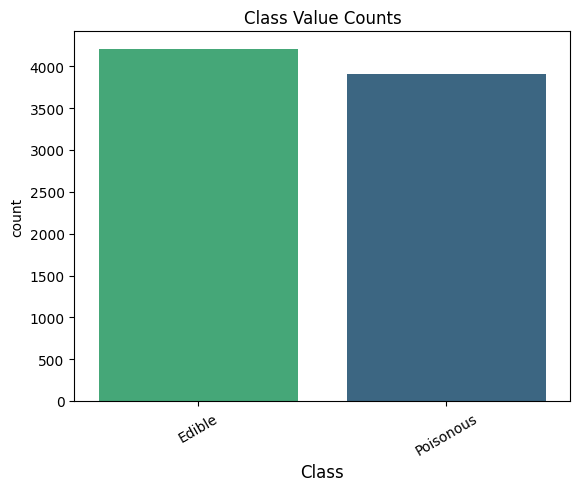

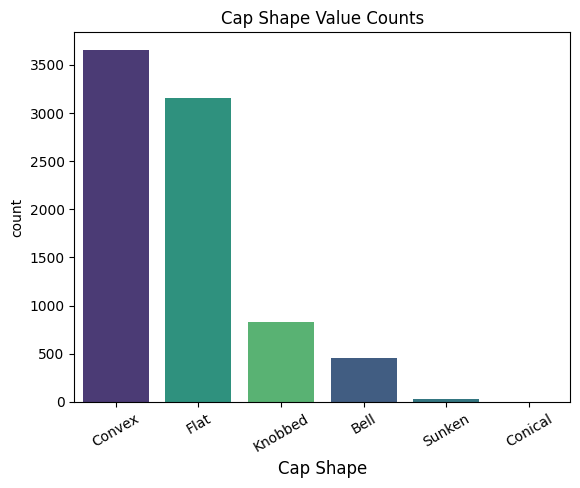

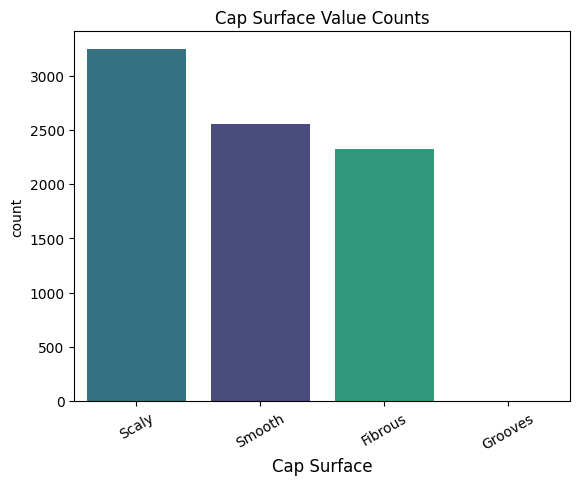

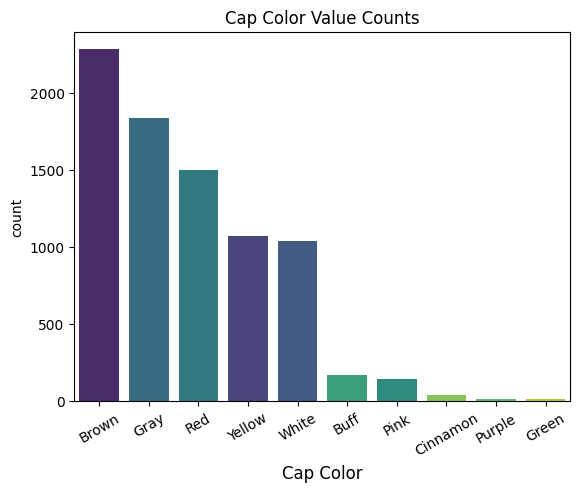

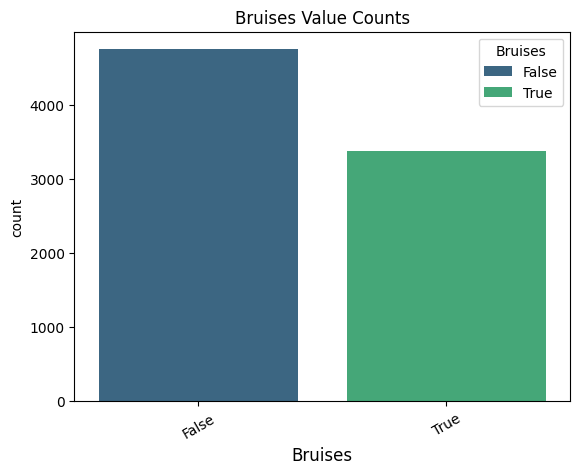

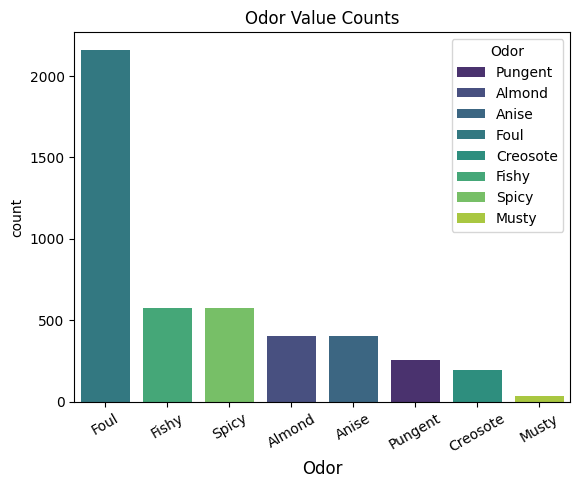

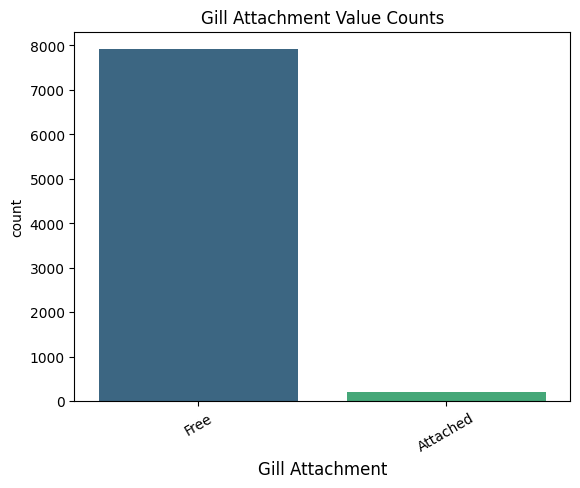

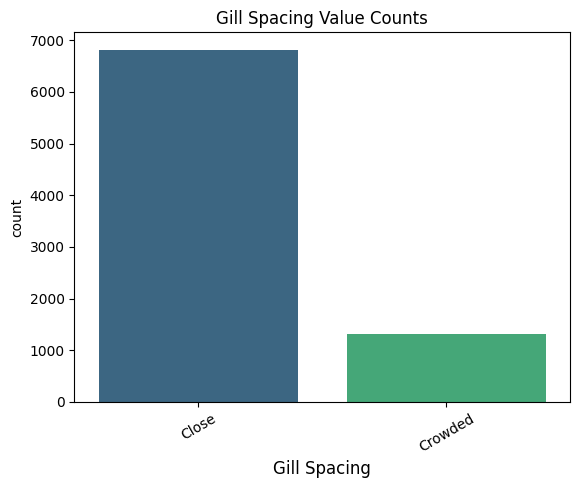

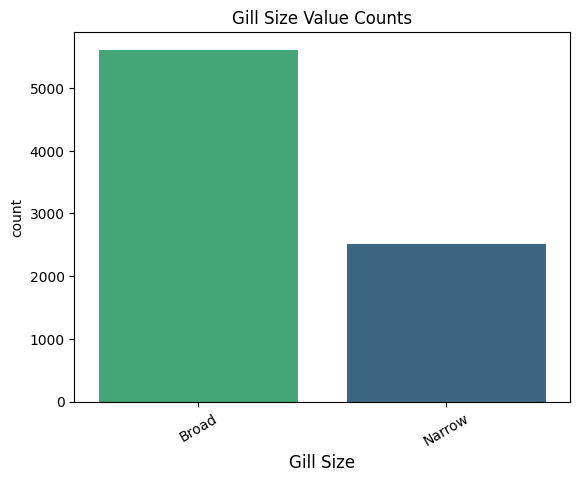

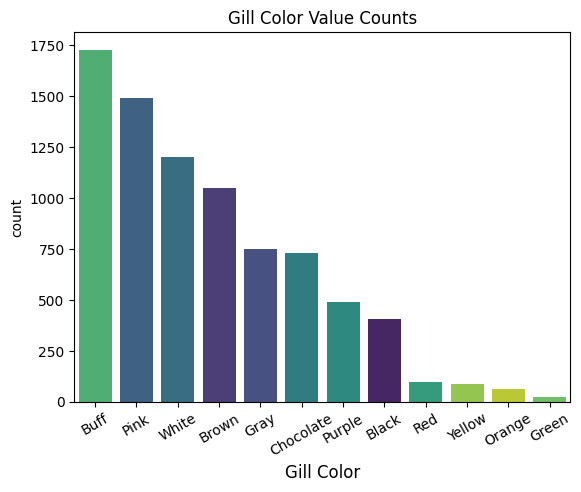

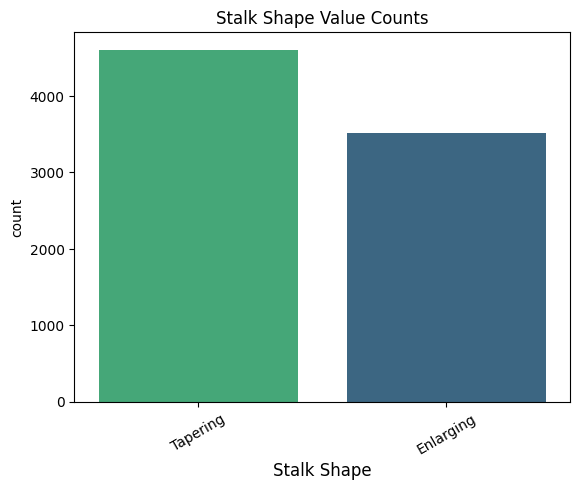

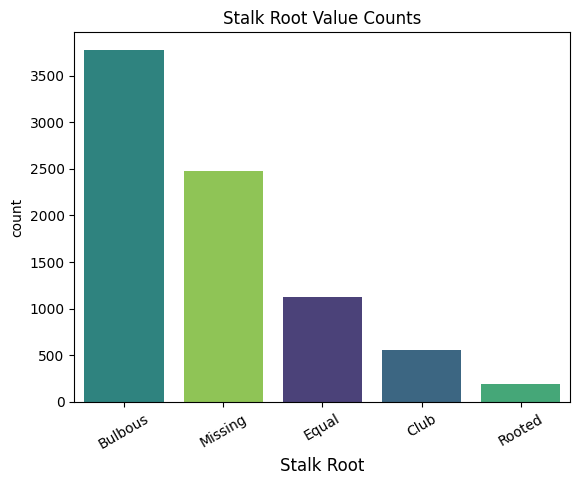

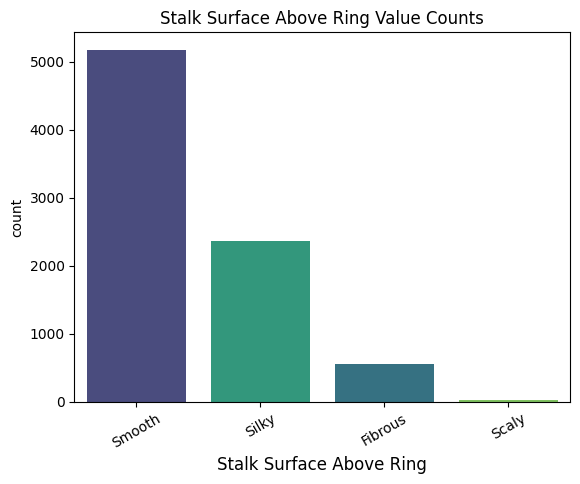

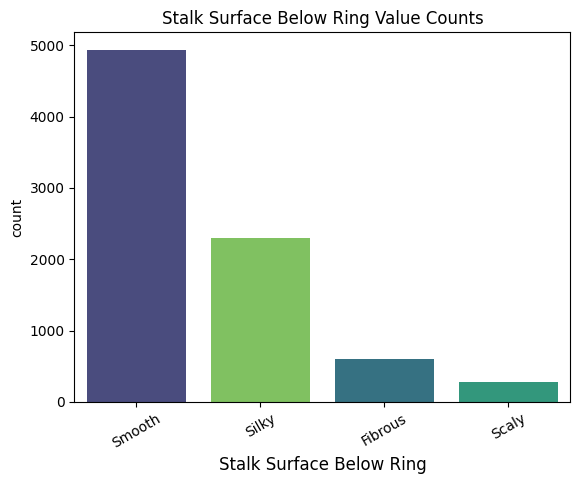

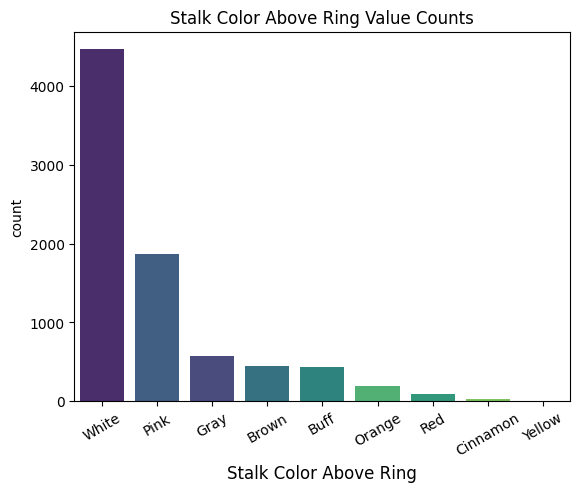

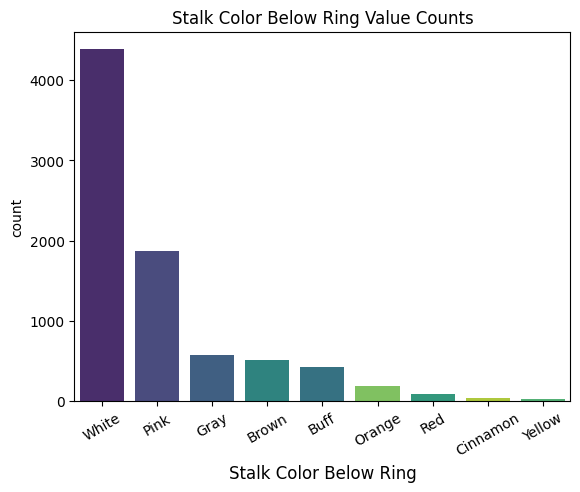

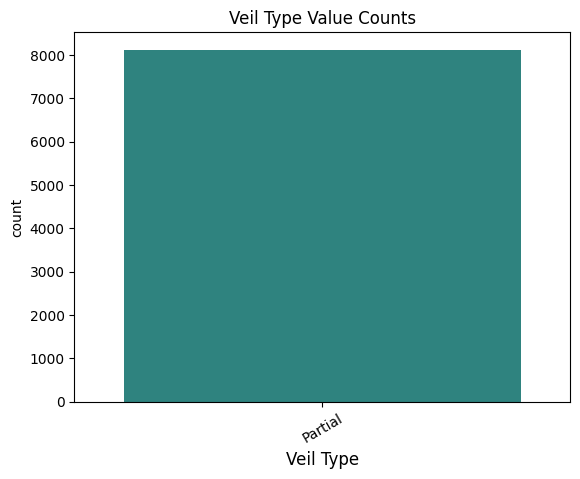

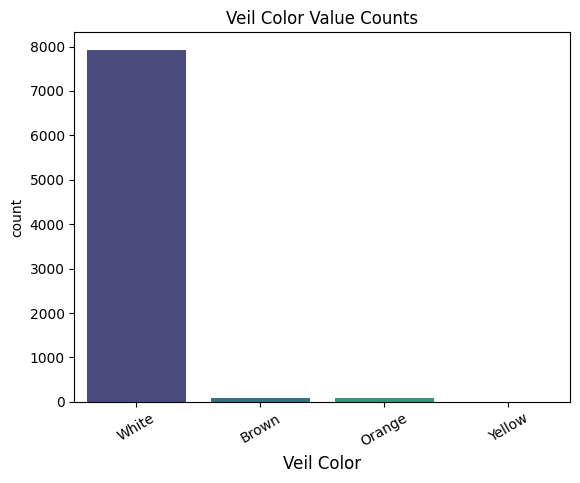

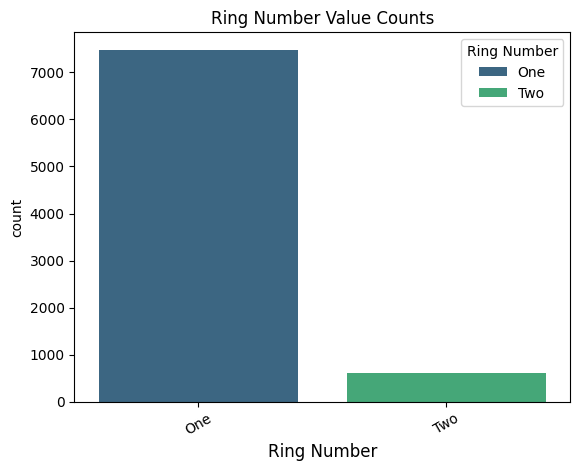

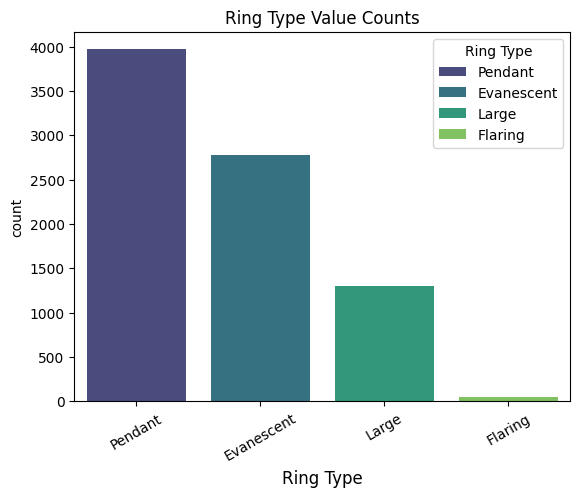

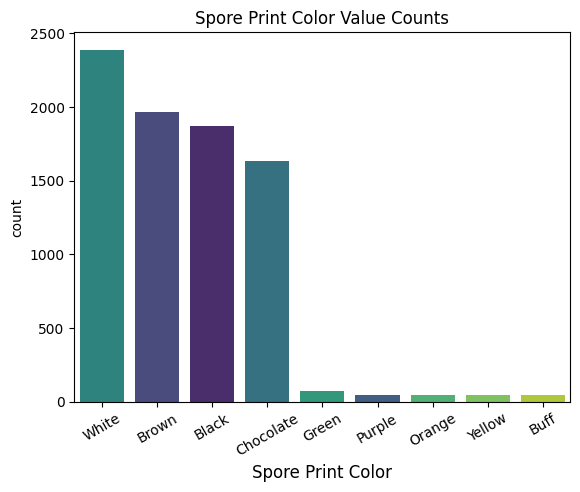

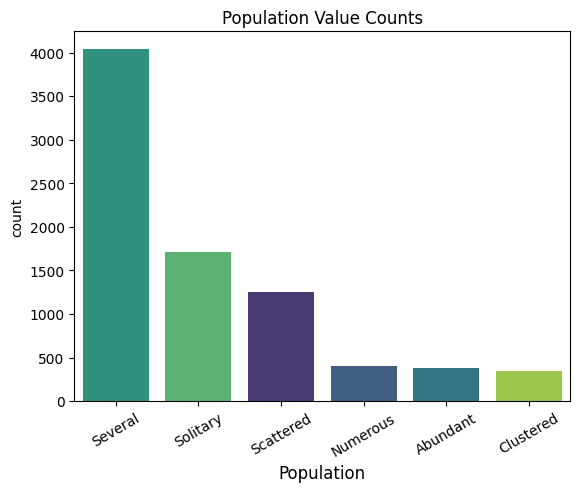

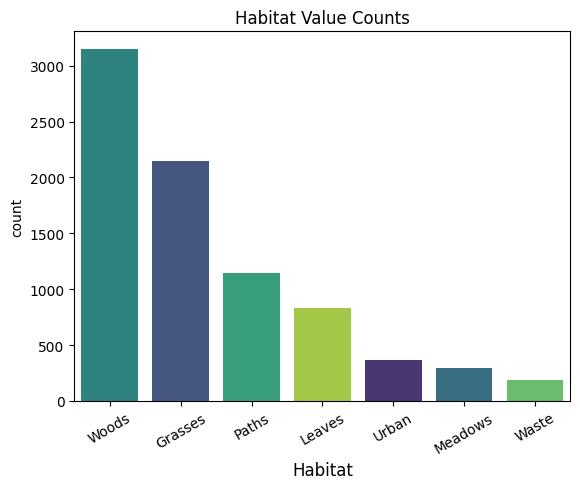

<Figure size 640x480 with 0 Axes>

In [27]:
for column in columns:
    sns.countplot(x=df[column], data=df, order=df[column].value_counts().index, palette='viridis', hue=df[column])
    plt.title(f'{column} Value Counts')
    # rotates the value labels slightly so they don't overlap, also slightly increases font size
    plt.xticks(rotation=30, fontsize=10)
    # increases the variable label font size slightly to increase readability
    plt.xlabel(column, fontsize=12)
    plt.show()
    plt.clf()